# EDA Diwali Sales

## Importing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [3]:
df = pd.read_csv("Diwali Sales Data.csv", encoding= 'unicode_escape')

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df['Product_Category'].value_counts()

Product_Category
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

## Cleaning

    Dropping nulls

In [8]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [9]:
df.drop(['Status', 'unnamed1'], axis= 1, inplace= True)

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [11]:
df[df['Amount'].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [12]:
df.dropna(inplace= True)

In [13]:
df[df['Amount'].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount


In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [16]:
df[['Orders', 'Amount']].describe()

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610858
std,1.114967,5222.355869
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

<Axes: xlabel='Gender', ylabel='count'>

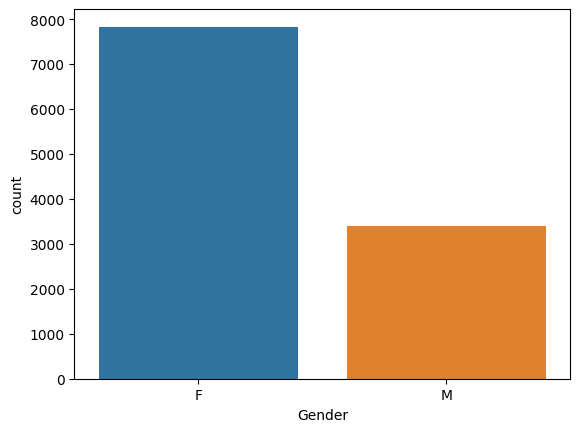

In [17]:
# plotting a bar chart for Gender and it's count

sns.countplot(data= df, x= 'Gender', hue= 'Gender')

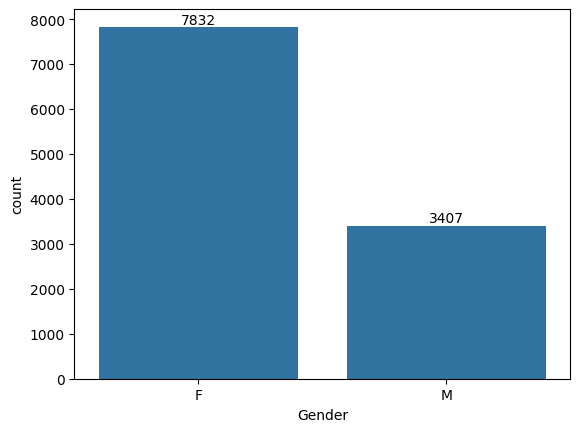

In [18]:
plot = sns.countplot(data= df, x= 'Gender')

for bars in plot.containers:
    plot.bar_label(bars)

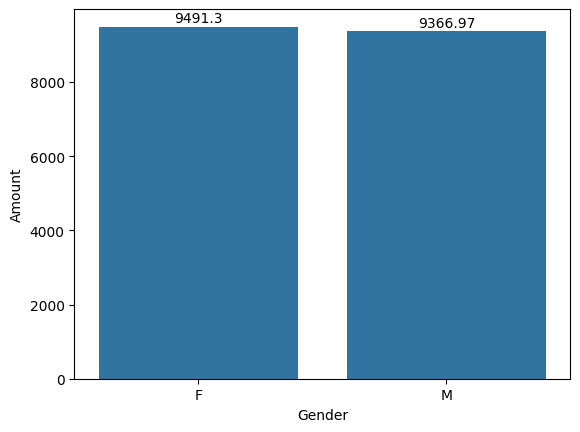

In [19]:
# plotting a bar chart for gender vs total amount
# Average amount spent by each gender

# plt.figure(figsize= (4,12))
plot = sns.barplot(data = df, x= 'Gender', y= 'Amount', errorbar=None)

#errorbar is to remove markers

for bar in plot.containers:
    plot.bar_label(bar, padding = 1)

# plt.show()

In [25]:
totalAmountByGender = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= True)

In [28]:
totalAmountByGender

,Gender,Amount
1,M,31913276.00
0,F,74335856.43


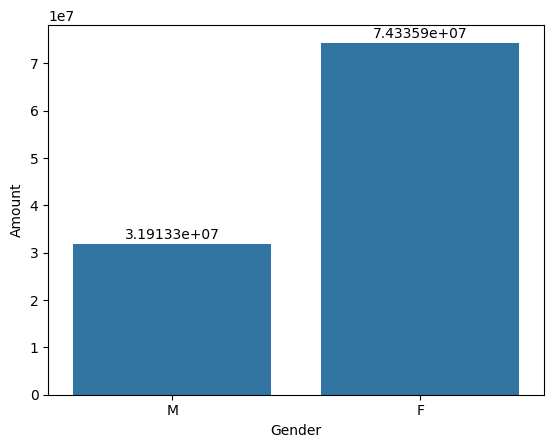

In [27]:
plot = sns.barplot(data= totalAmountByGender, x= 'Gender', y= 'Amount')

for bar in plot.containers:
    plot.bar_label(bar, padding = 1)

    Conclusions and Insights:-
1. Average vs. Total: 
    The similarity in average spending suggests that the spending pattern per transaction is consistent across genders. However, the large difference in total spending indicates that the frequency of transactions differs between genders.

2. Business Implication:
    If your goal is to target the segment that generates the most revenue, focusing on females might be more effective, as they contribute a significantly larger share of the total sales.

3. Further Analysis: 
    You might consider analyzing the number of transactions for each gender to confirm the hypothesis that females make more transactions, which leads to the higher total amount.

In [30]:
#Transaction count per Gender

transactionCountPerGender = df['Gender'].value_counts()

transactionCountPerGender

Gender
F    7832
M    3407
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

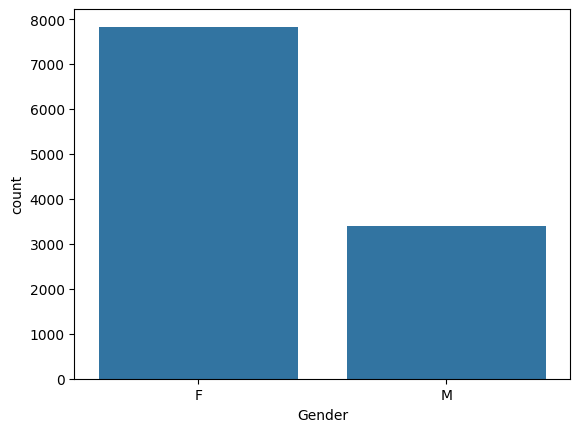

In [31]:
sns.countplot(data= df, x= 'Gender')

<Axes: xlabel='Gender', ylabel='Amount'>

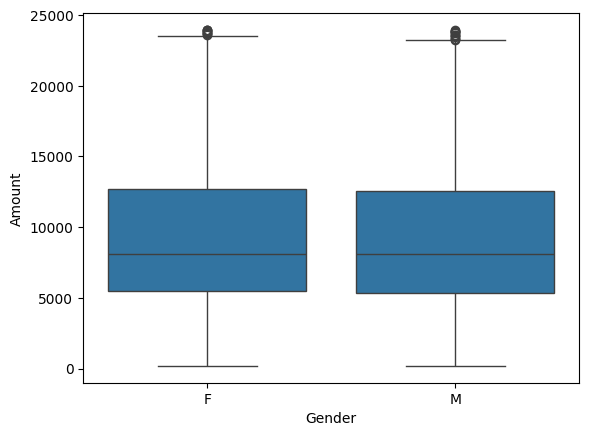

In [32]:
sns.boxplot(data= df, x= 'Gender', y= 'Amount')

Conclusion:
1. Insight: 
    The similarity in the boxplots confirms that individual spending behavior between males and females does not differ much in terms of average transaction amounts.
2. Business Focus: 
    Given that the total amount spent by females is significantly higher (based on your earlier analysis), the difference may come from the frequency of transactions rather than the amount per transaction.
This analysis reinforces the idea that females might be making more transactions overall, even though the amount per transaction is similar for both genders.

### AGE

<Axes: xlabel='Age Group', ylabel='count'>

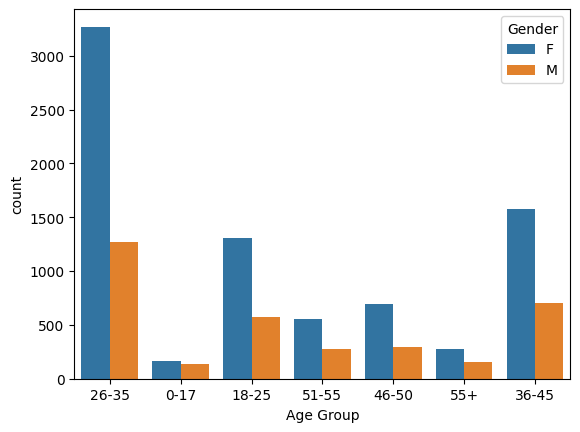

In [41]:
sns.countplot(data= df, x= 'Age Group', hue= 'Gender')

In [47]:
df.groupby(['Age Group'], as_index= False)['Amount'].sum()

,Age Group,Amount
0,0-17,2699653.00
1,18-25,17240732.00
2,26-35,42613443.94
3,36-45,22144995.49
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00


<Axes: xlabel='Age Group', ylabel='Amount'>

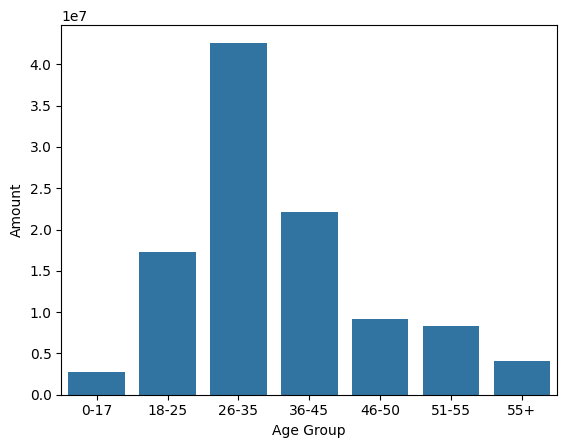

In [46]:
ageGroupPurchasePower = df.groupby(['Age Group'], as_index= False)['Amount'].sum()

sns.barplot(data= ageGroupPurchasePower, x= 'Age Group', y = 'Amount')

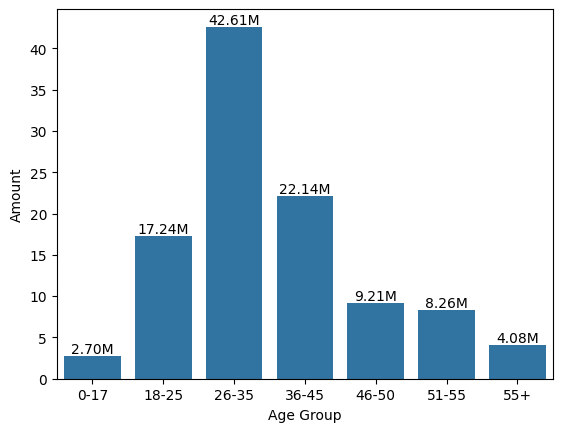

In [48]:
ageGroupPurchasePower['Amount'] = ageGroupPurchasePower['Amount'] / 1000000

plot = sns.barplot(data= ageGroupPurchasePower, x='Age Group', y= 'Amount')

for bar in plot.containers:
    plot.bar_label(bar, labels= [f'{v:.2f}M' for v in bar.datavalues])

Text(0, 0.5, 'Total Amount')

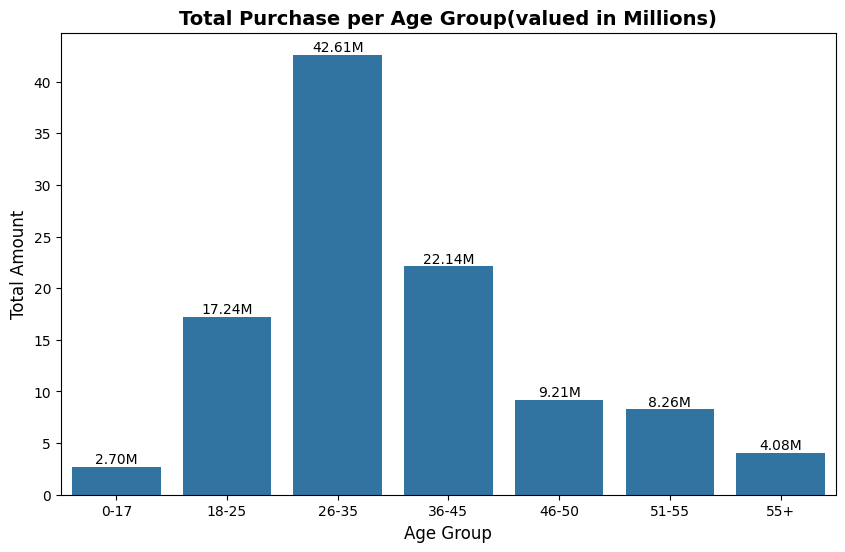

In [55]:
plt.figure(figsize= (10,6))

plot = sns.barplot(data= ageGroupPurchasePower, x='Age Group', y= 'Amount')

for bar in plot.containers:
    plot.bar_label(bar, labels= [f'{v:.2f}M' for v in bar.datavalues])

plt.title("Total Purchase per Age Group(valued in Millions)",
          fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Age Group",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})

### Age Group and Gender

In [61]:
ageByGender = df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum()

In [65]:
ageByGender['Amount'] = ageByGender['Amount'] / 1000000

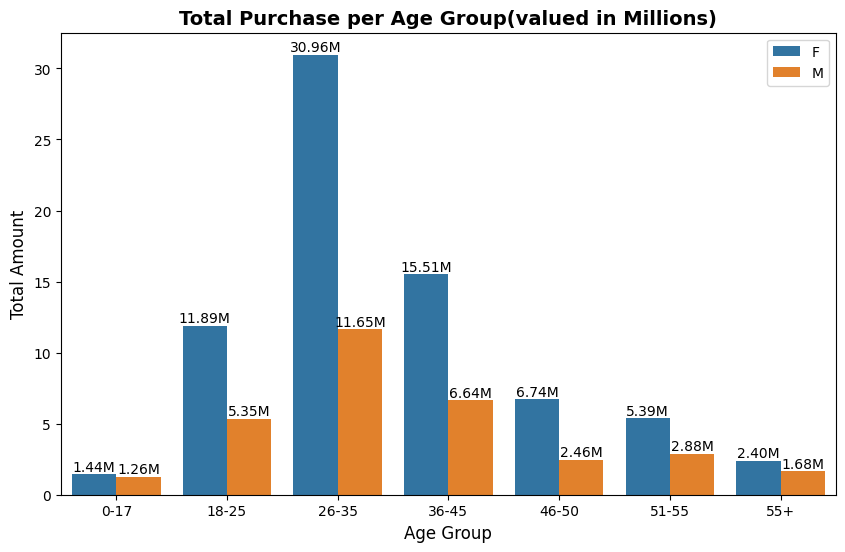

In [67]:
plt.figure(figsize= (10,6))

plot = sns.barplot(data= ageByGender, x= 'Age Group', y= 'Amount', hue= 'Gender', errorbar=None)

for bar in plot.containers:
    plot.bar_label(bar, labels= [f"{v:.2f}M" for v in bar.datavalues])

plt.title("Total Purchase per Age Group(valued in Millions)",
          fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Age Group",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})

plot.legend(loc = 'upper right')

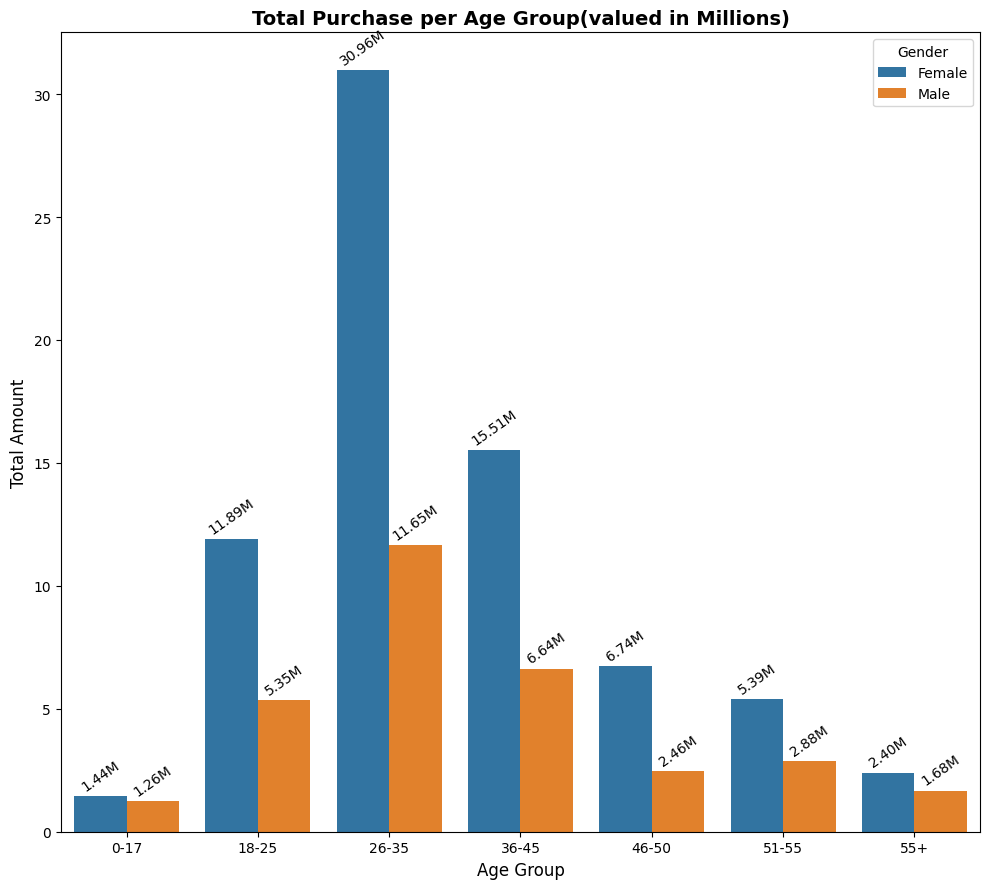

In [84]:
plt.figure(figsize= (10,9))

plot = sns.barplot(data= ageByGender, x= 'Age Group', y= 'Amount', hue= 'Gender', errorbar=None)

for bar in plot.containers:
    plot.bar_label(bar, labels= [f"{v:.2f}M" for v in bar.datavalues],
                   rotation = 35,
                   padding= 2)

plt.title("Total Purchase per Age Group(valued in Millions)",
          fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Age Group",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})

# Adjusting the layout to avoid overlaps
plt.tight_layout() # Adjusts subplots to fit in to the figure area.
# plt.subplots_adjust(top=1) 

plot.legend(['Female', 'Male'], title = 'Gender', loc = 'upper right')

plt.show()

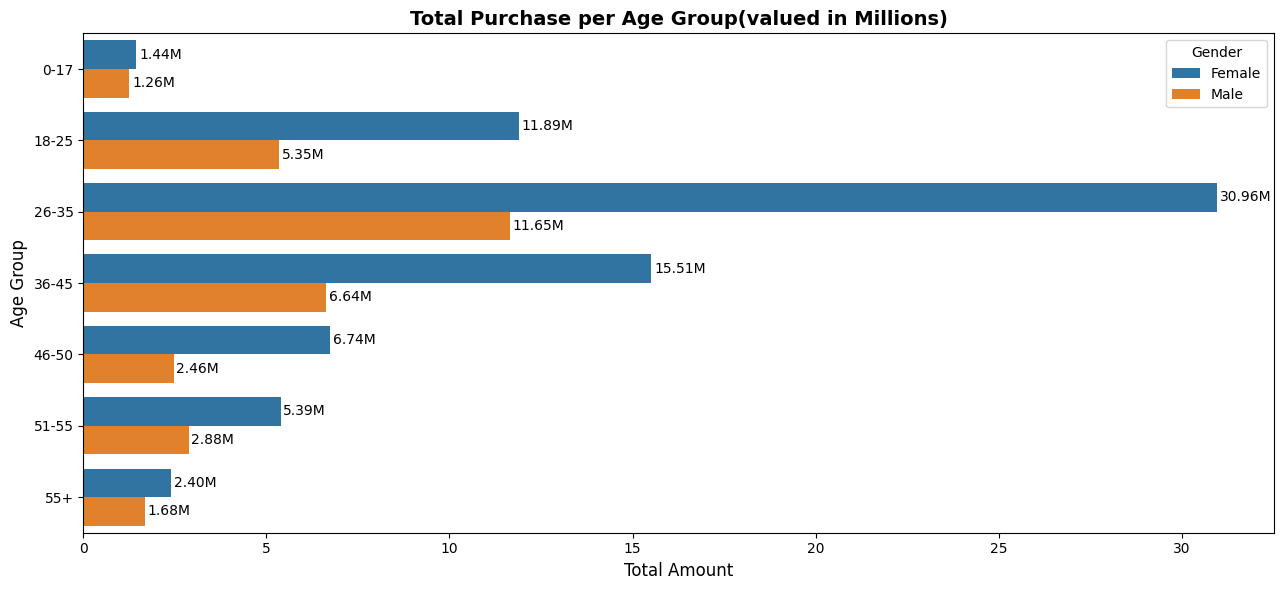

In [92]:
plt.figure(figsize= (13,6))

plot = sns.barplot(data= ageByGender,x = 'Amount', y= 'Age Group', hue= 'Gender', errorbar=None,
                   orient= 'h')

for bar in plot.containers:
    plot.bar_label(bar, labels= [f"{v:.2f}M" for v in bar.datavalues],
                   padding= 2)

plt.title("Total Purchase per Age Group(valued in Millions)",
          fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel("Age Group",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})
plt.xlabel("Total Amount",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})

# Adjusting the layout to avoid overlaps
plt.tight_layout() # Adjusts subplots to fit in to the figure area.
# plt.subplots_adjust(top=1) 

plot.legend(['Female', 'Male'], title = 'Gender', loc = 'upper right')

plt.show()

### State and Zone

In [102]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [94]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

<Axes: xlabel='count', ylabel='State'>

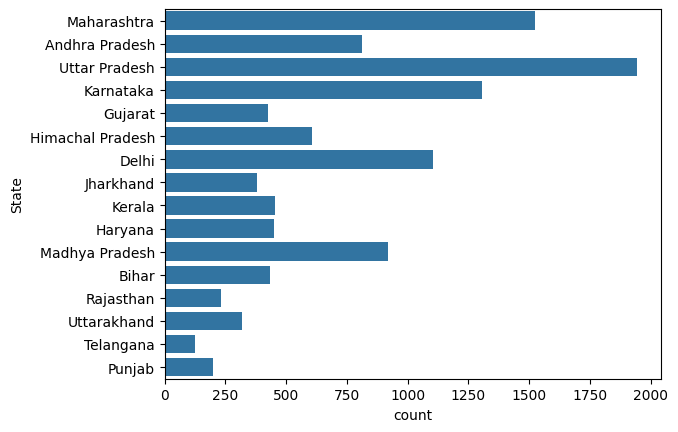

In [101]:
sns.countplot(data= df, y='State')

Each bar's length corresponds to the number of entries in the DataFrame for that specific state. Longer bars indicate a higher number of occurrences for that state, while shorter bars indicate fewer occurrences.

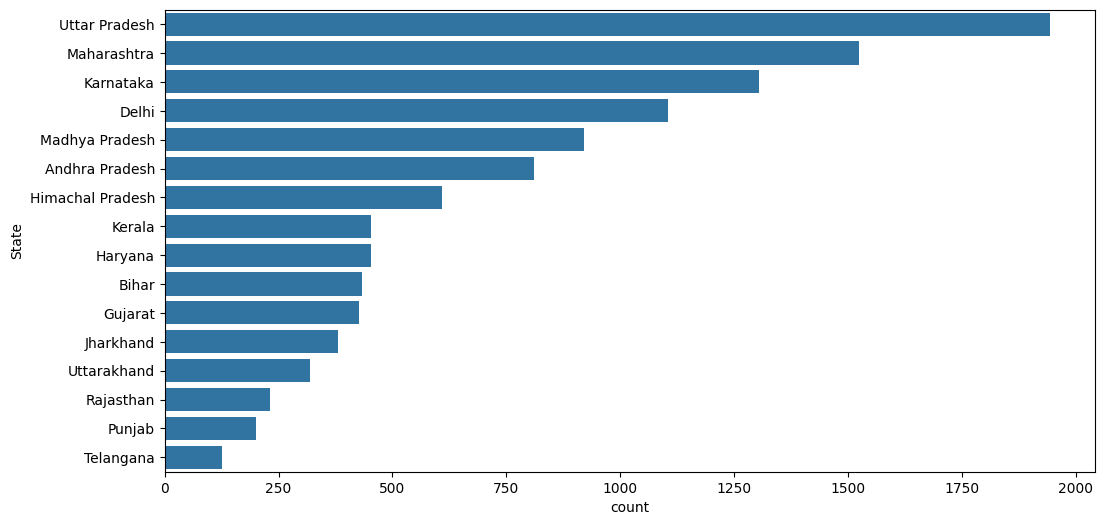

In [106]:
plt.figure(figsize= (12,6))

sns.countplot(data= df, y= 'State',
              order=df['State'].value_counts().index)

plt.show()

    Insight:
        Above graph gives the transaction freequency of the each State.

<Axes: xlabel='Orders', ylabel='State'>

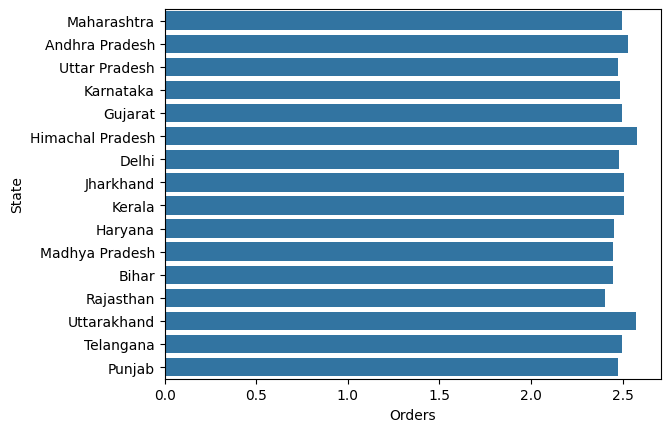

In [118]:
sns.barplot(data= df, y='State', x= 'Orders', errorbar= None)

    Insight:
        Above graph gives the average orders from each state.Meaning every time they order, on an average they order like that

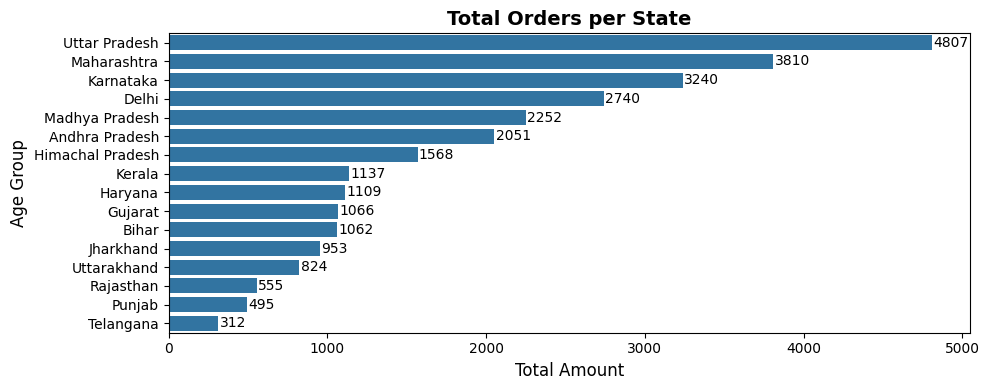

In [129]:
# Calculate total orders per state
total_orders_per_state = df.groupby('State', as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

plt.figure(figsize= (10,4))
plot = sns.barplot(data= total_orders_per_state, y= 'State', x='Orders', errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar,
                   padding= 1)

plt.title("Total Orders per State",
          fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel("Age Group",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})
plt.xlabel("Total Amount",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})
plt.tight_layout()
plt.show()

    Insight:
        Above graph gives the total orders from each state.
    
    Conclusion:
    By Observing Above two graph we can say that even the Distribution of Average Orders placed by each State is uniform, Uttar Pradesh takes the lead in Total Orders implying that it makes more Orders than Other states.

In [119]:
df['State'].value_counts()

State
Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

<Axes: xlabel='Amount', ylabel='State'>

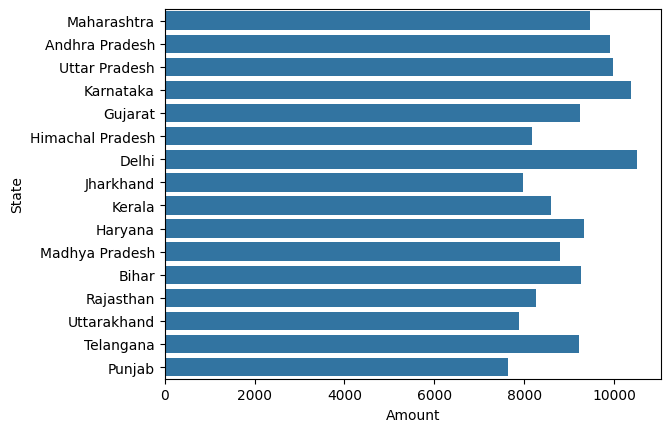

In [110]:
sns.barplot(data= df, y='State', x= 'Amount', errorbar= None)

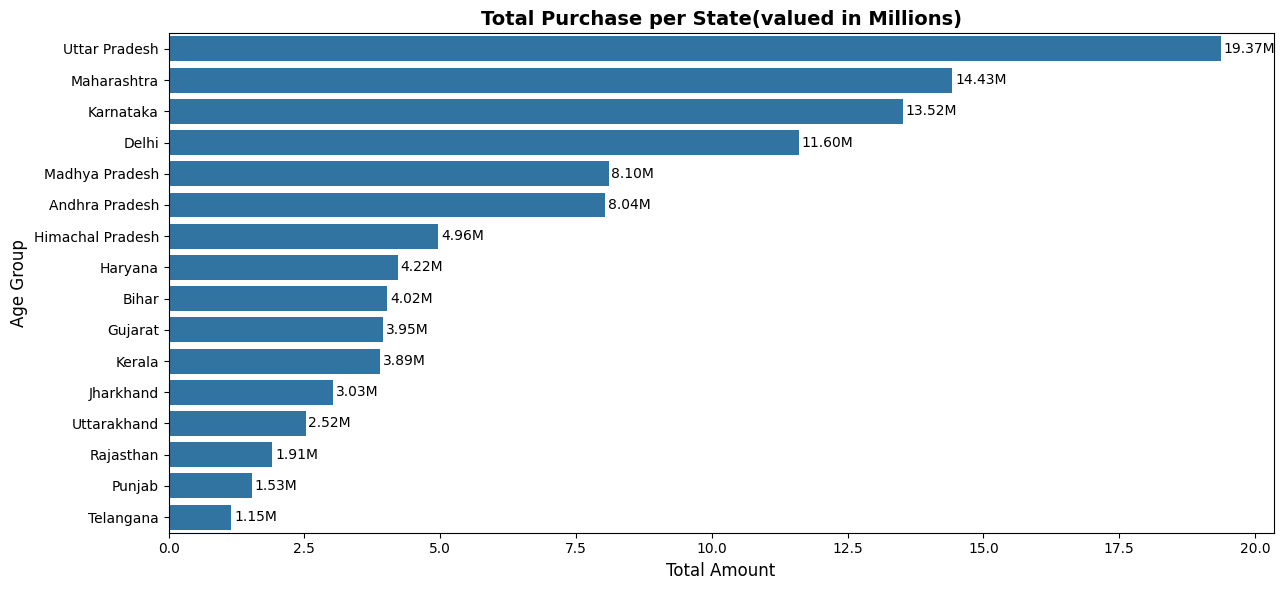

In [132]:
total_amount_per_state = df.groupby('State', as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

total_amount_per_state['Amount'] = total_amount_per_state['Amount'] /1000000

plt.figure(figsize= (13,6))
plot = sns.barplot(data= total_amount_per_state, y= 'State', x= 'Amount',
            errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar, labels= [f"{v:.2f}M" for v in bar.datavalues],
                   padding= 2)

plt.title("Total Purchase per State(valued in Millions)",
          fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel("Age Group",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})
plt.xlabel("Total Amount",
           fontdict={'fontsize': 12, 'fontweight': 'normal'})

plt.tight_layout() 
plt.show()


In [107]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

<Axes: xlabel='Zone', ylabel='count'>

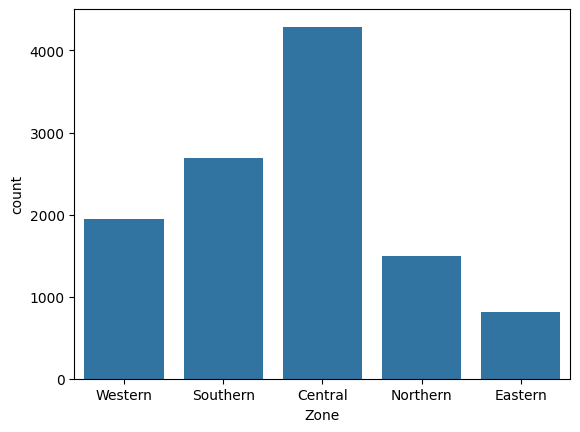

In [108]:
sns.countplot(data= df, x= 'Zone')

    Insight:
The above graph gives us the frequency of Transactions per Zone of which Central Zone took the lead

<Axes: xlabel='Zone', ylabel='Orders'>

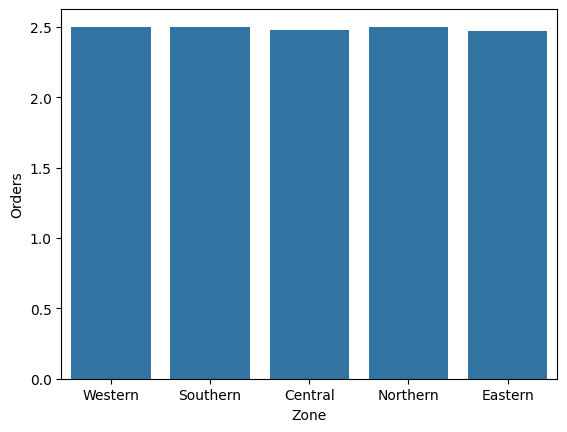

In [109]:
sns.barplot(data= df, x= 'Zone', y='Orders', errorbar= None)

    Insight:
1. The above graph gives us the average Orders placed by each Zone, which is uniform
2. We saw the Central Zone has freequently placed the Orders, yet the every time it placed, it placed more or less same with respect 
to the other zones

<Axes: xlabel='Zone', ylabel='Orders'>

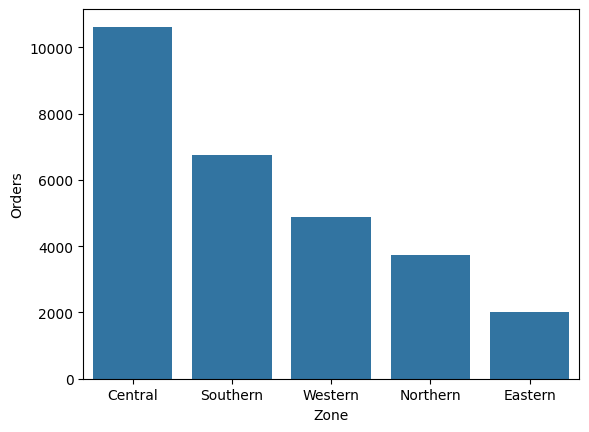

In [133]:
total_orders_per_zone = df.groupby('Zone', as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

sns.barplot(data= total_orders_per_zone, x= 'Zone', y= 'Orders',
            errorbar= None)

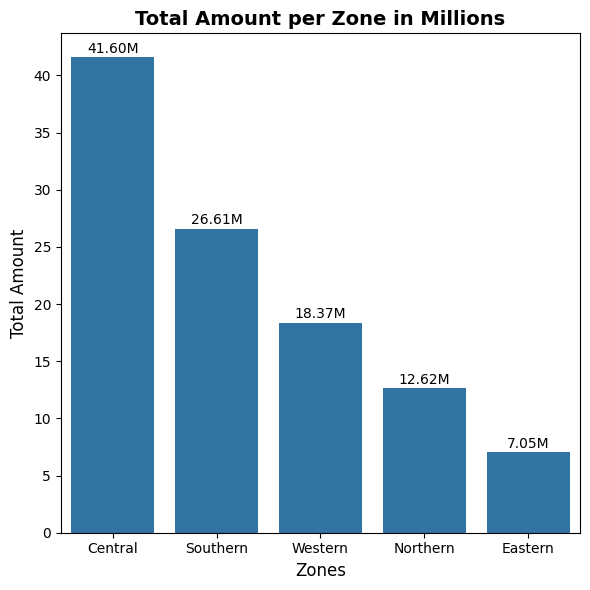

In [142]:
total_amount_per_zone = df.groupby('Zone', as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

total_amount_per_zone['Amount'] = total_amount_per_zone['Amount'] / 1000000

plt.figure(figsize= (6,6))
plot = sns.barplot(data= total_amount_per_zone, x= 'Zone', y= 'Amount',
            errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar,
                   labels= [f'{v:.2f}M' for v in bar.datavalues],
                   padding = 1)

plt.title("Total Amount per Zone in Millions",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold'})
plt.xlabel("Zones",
           fontdict={'fontsize': 12,
                     'fontweight' : 'normal'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'normal'})

plt.tight_layout()
plt.show()

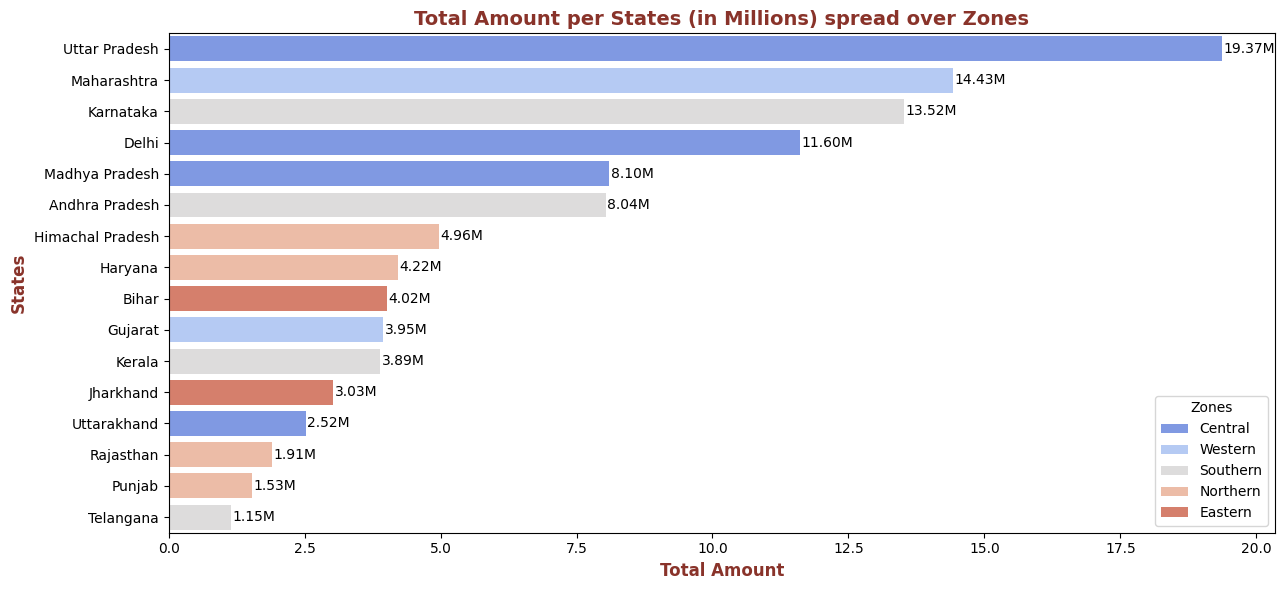

In [167]:
# Zones and States

purchaseCapacity = df.groupby(['Zone', 'State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)

purchaseCapacity['Amount'] = purchaseCapacity['Amount'] / 1000000

plt.figure(figsize= (13,6))
plot = sns.barplot(data= purchaseCapacity, y= 'State', x= 'Amount',
                   hue= 'Zone',
                   palette= 'coolwarm',
                   errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar,
                   labels= [f'{v:0.2f}M' for v in bar.datavalues],
                   padding= 1)
    
plt.title("Total Amount per States (in Millions) spread over Zones",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("States",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(title = 'Zones')
plt.tight_layout()

plt.show()

### Product Category

In [168]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [169]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

C:\Users\Avinash\AppData\Local\Temp\ipykernel_13856\1247706648.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right', fontsize=10)


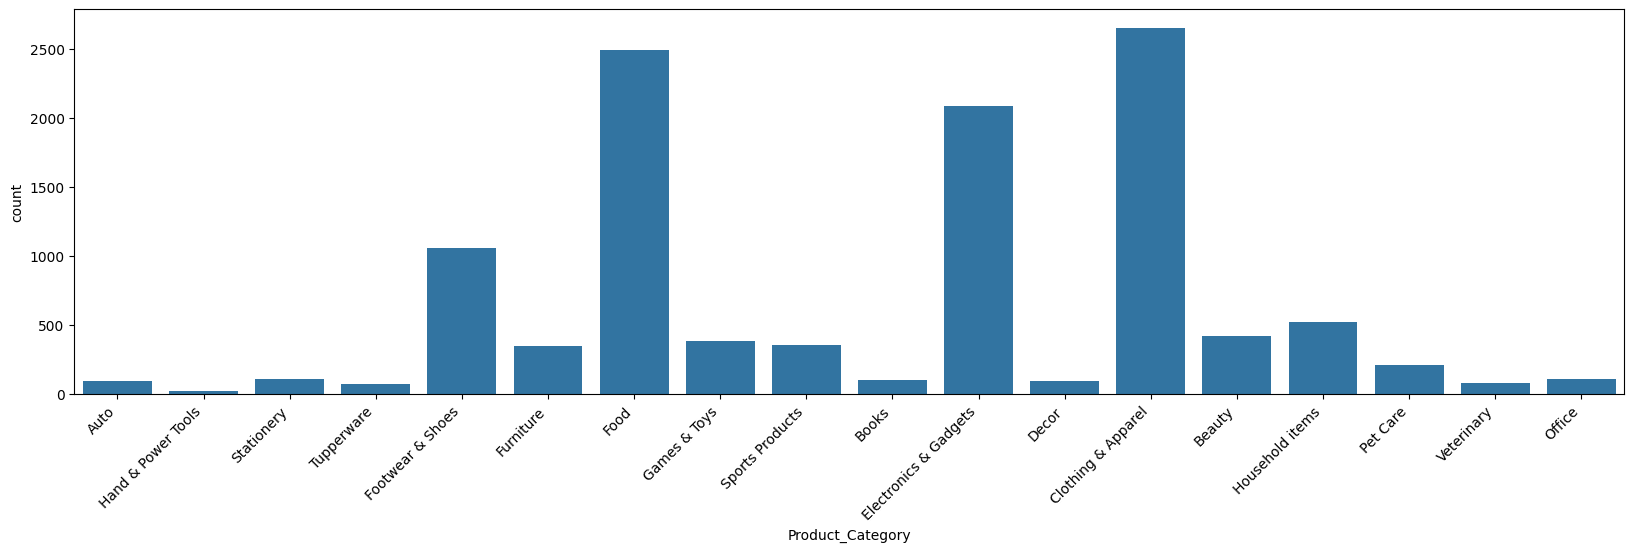

In [175]:
plt.figure(figsize=(20,5))
plot = sns.countplot(data= df, x= 'Product_Category')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.show()

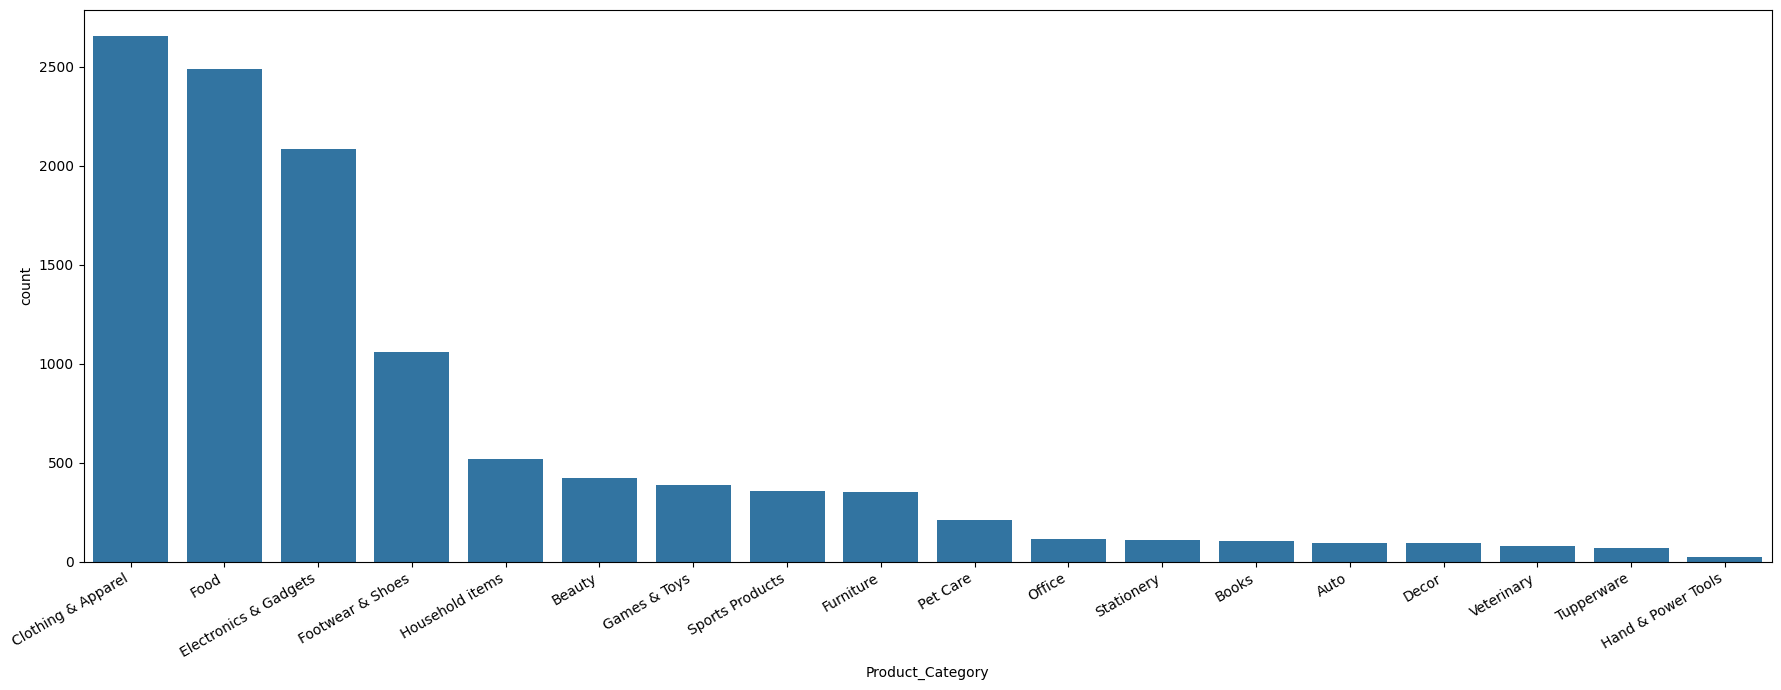

In [202]:
plt.figure(figsize=(18,7))
plot = sns.countplot(data= df, x= 'Product_Category',
                     order= df['Product_Category'].value_counts().index)

# Rotate the x-axis labels using the Matplotlib's set method
for label in plot.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right')
    # Adjust the x position
    # label.set_position((label.get_position()[0], label.get_position()[1])) 
plt.tight_layout()  

plt.show()

    Insight: 
Most frequently placed Product_Category is 'Clothing and Apparel'

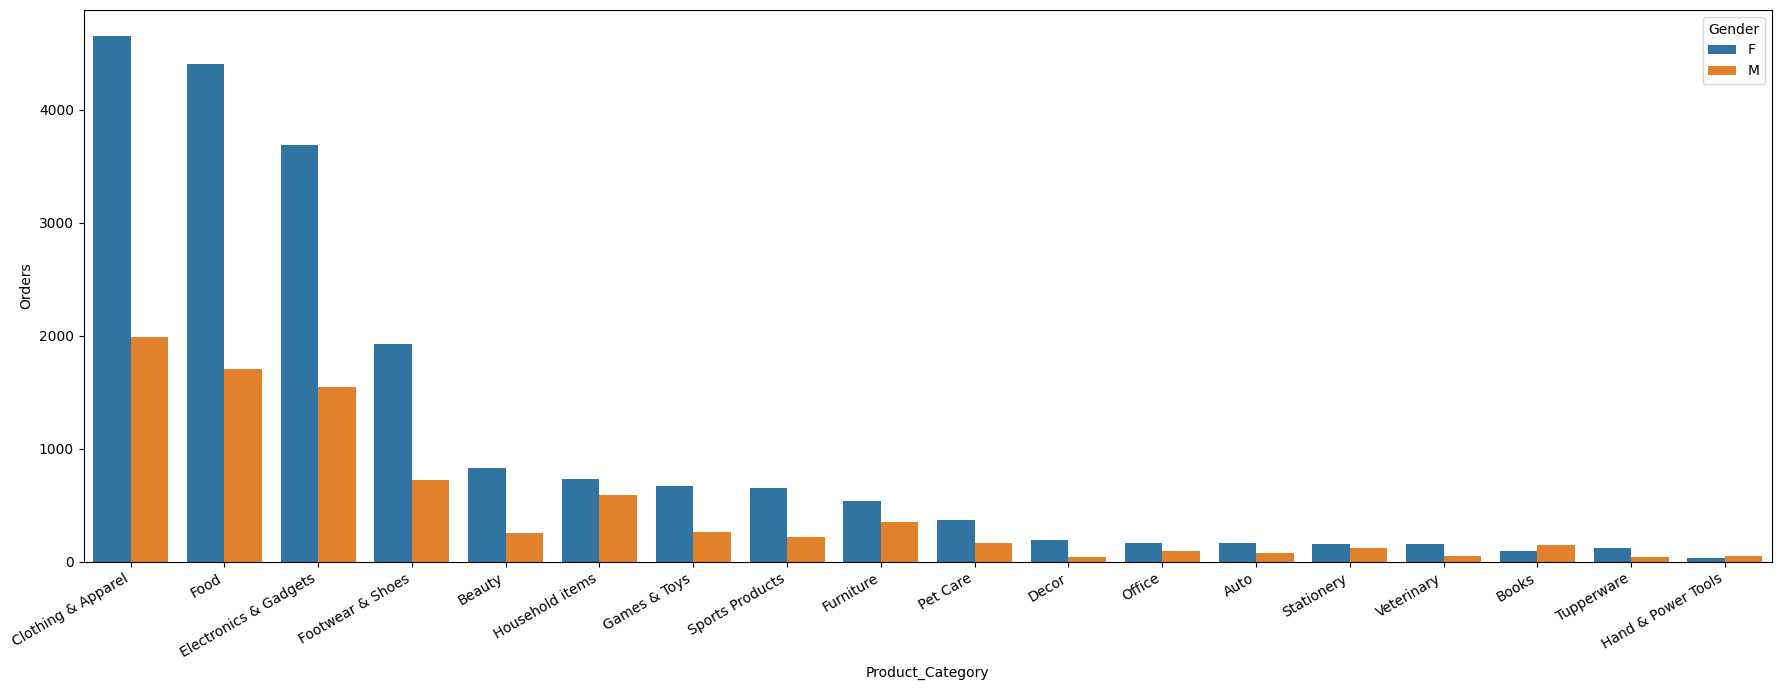

In [210]:
product_category_orders = df.groupby(['Product_Category','Gender'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

plt.figure(figsize=(18,7))
plot = sns.barplot(data= product_category_orders, x='Product_Category', y='Orders',
                   hue = 'Gender',
                   errorbar= None)
for label in plot.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right') 
plt.tight_layout() 
plt.show()

    Insights:
Upon the top 3 Categories, Woman spends significantly more than men

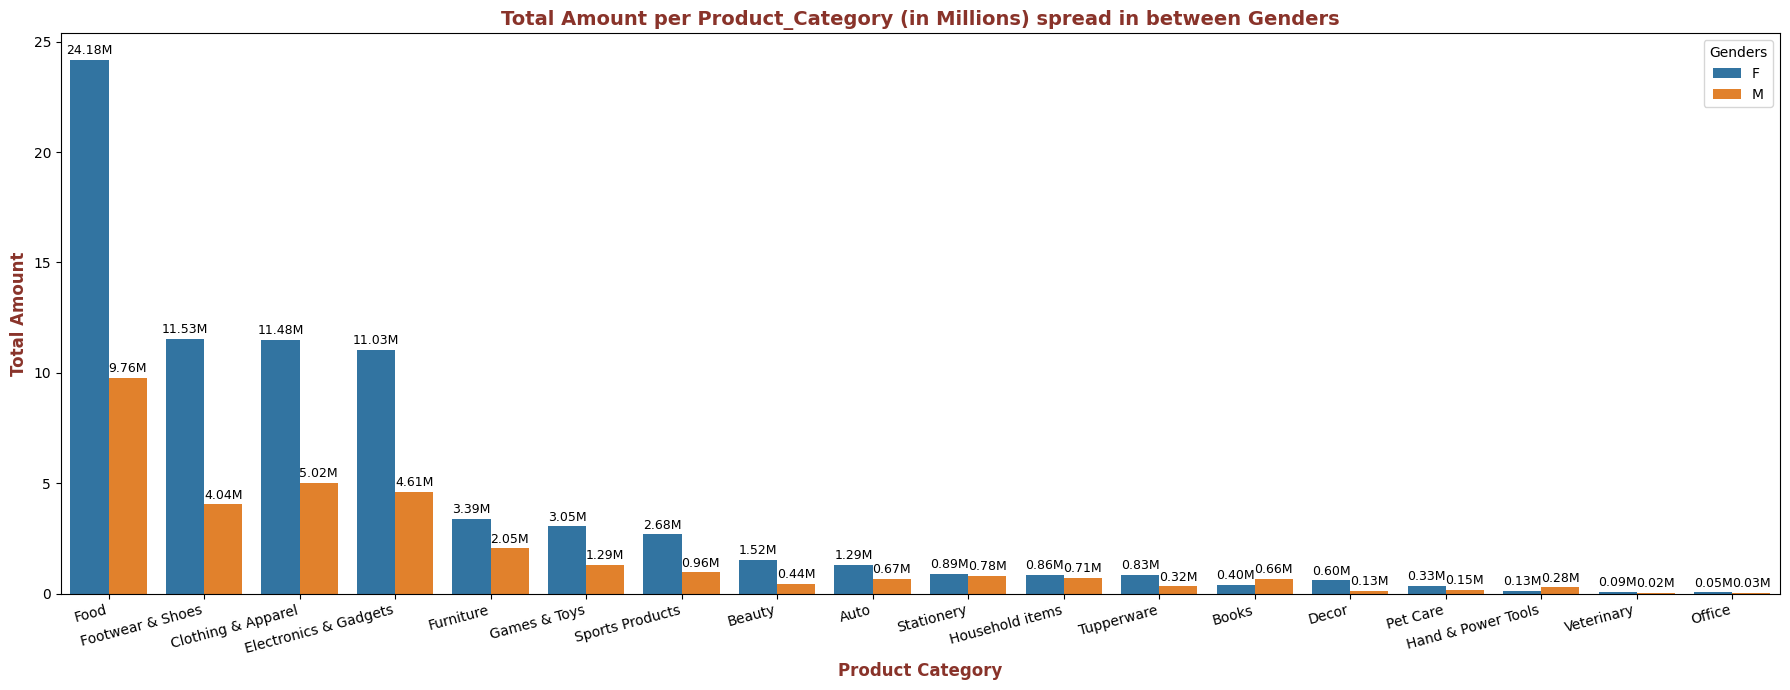

In [226]:
product_category_amount = df.groupby(['Product_Category','Gender'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

product_category_amount['Amount'] = product_category_amount['Amount'] /1000000

plt.figure(figsize=(18,7))
plot = sns.barplot(data= product_category_amount, x='Product_Category', y='Amount',
                   hue= 'Gender',
                   errorbar= None)

for label in plot.get_xticklabels():
    label.set_rotation(15)
    label.set_ha('right') 

for bar in plot.containers:
    plot.bar_label(bar,
                   labels= [f'{v:0.2f}M' for v in bar.datavalues],
                   padding= 2,
                   fontsize = 9)
    
plt.title("Total Amount per Product_Category (in Millions) spread in between Genders",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Product Category",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(title = 'Genders')
plt.tight_layout()

plt.show()

    Conclusion: 
Even though Food is the second top category, it is yielding more Money.....


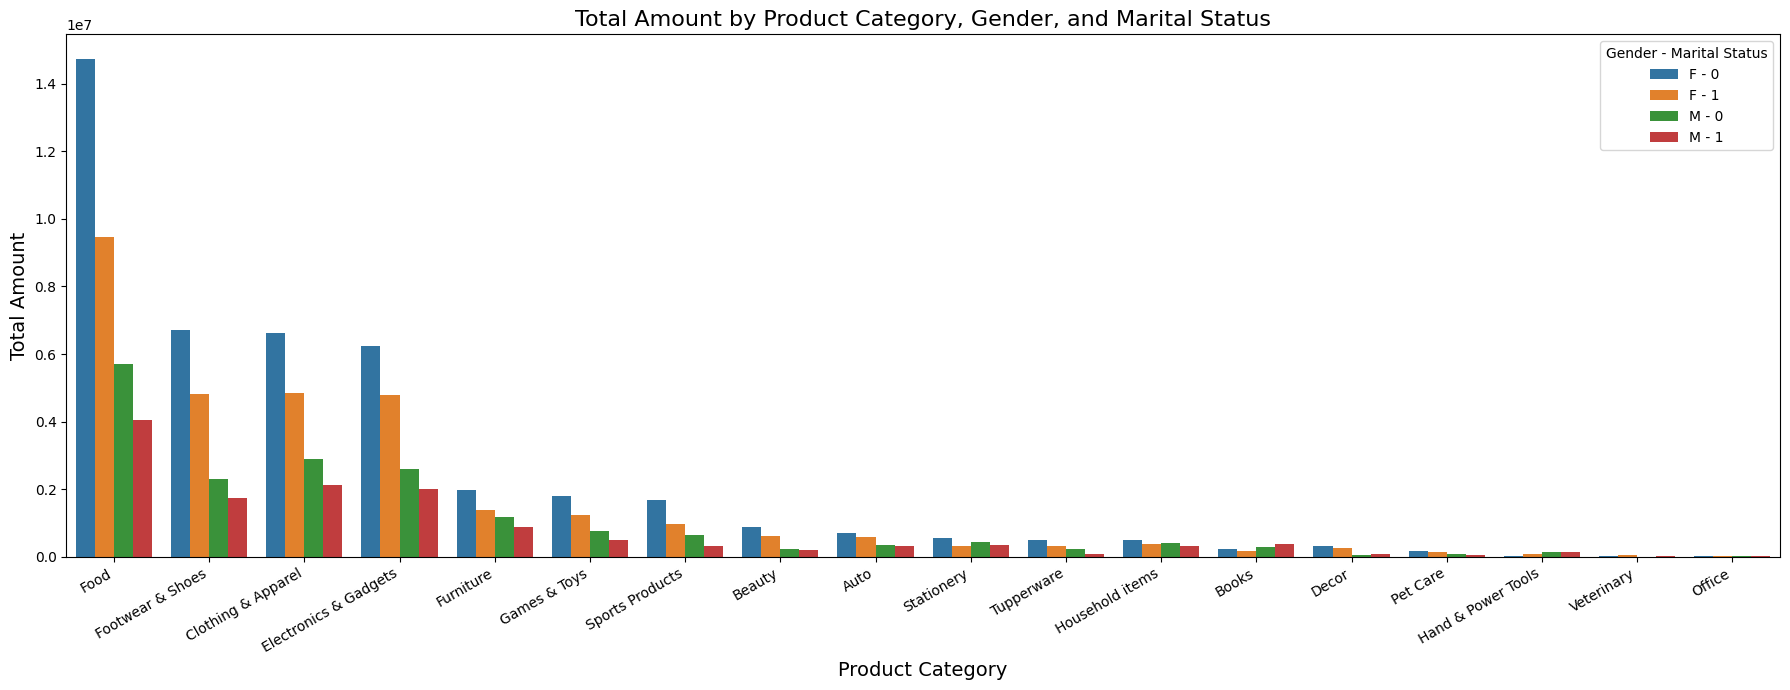

In [218]:
# # Create a new column that combines Gender and Marital_Status
# df['Gender_Marital_Status'] = df['Gender'] + ' - ' + df['Marital_Status'].astype(str)

# # Grouping by Product_Category and the new Gender_Marital_Status
# product_category_orders = df.groupby(['Product_Category', 'Gender_Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# plt.figure(figsize=(18, 7))

# # Plotting with hue for the combined Gender_Marital_Status
# plot = sns.barplot(data=product_category_orders, x='Product_Category', y='Amount', hue='Gender_Marital_Status', errorbar=None)

# # Setting rotation and alignment for x-axis labels
# for label in plot.get_xticklabels():
#     label.set_rotation(30)
#     label.set_ha('right')

# plt.title('Total Amount by Product Category, Gender, and Marital Status', fontsize=16)
# plt.xlabel('Product Category', fontsize=14)
# plt.ylabel('Total Amount', fontsize=14)

# # Adding legend title
# plt.legend(title='Gender - Marital Status')
# plt.tight_layout() 
# plt.show()


### Occupation

In [214]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


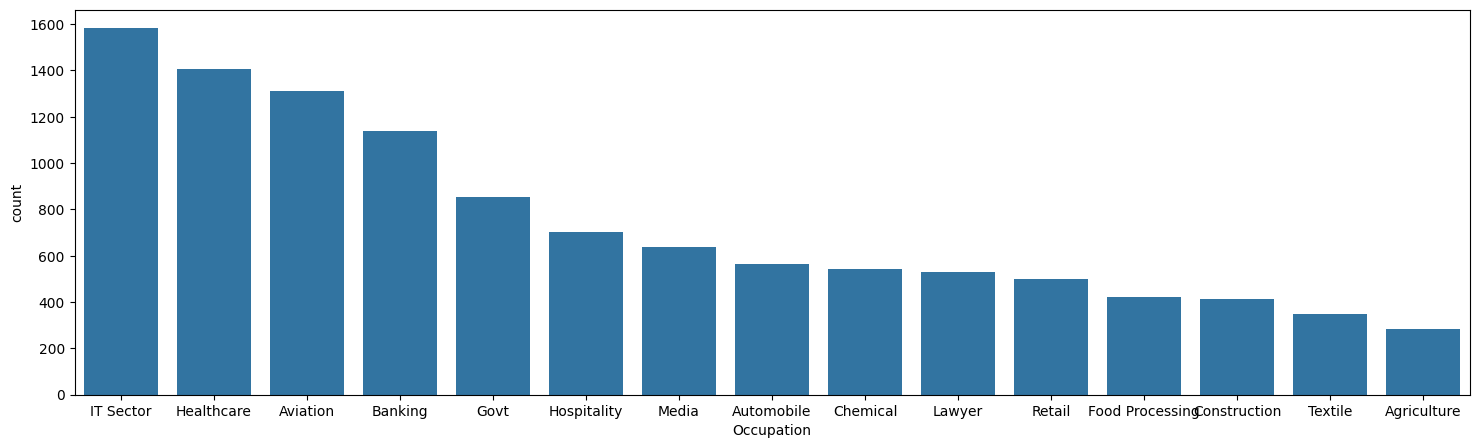

In [229]:
plt.figure(figsize= (18,5))
sns.countplot(data= df, x= 'Occupation',
              order= df['Occupation'].value_counts().index)
plt.show()

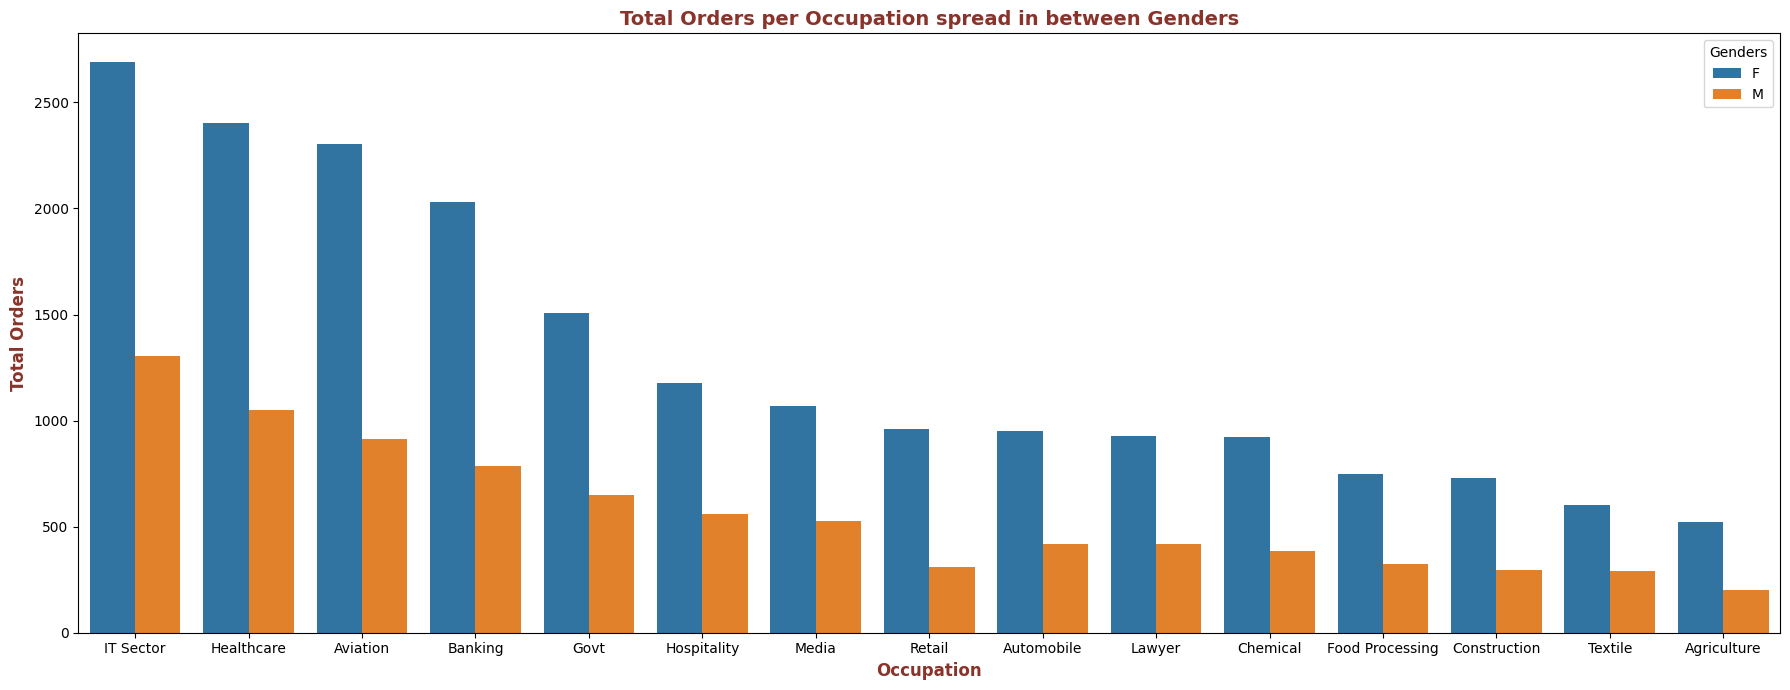

In [227]:
total_order_per_occupation = df.groupby(['Occupation', 'Gender'], as_index= False)['Orders'].sum().sort_values(by= 'Orders', ascending= False)

plt.figure(figsize= (18,7))

plot = sns.barplot(data= total_order_per_occupation, x= 'Occupation', y= 'Orders',
                   hue= 'Gender',
                   errorbar= None)

plt.title("Total Orders per Occupation spread in between Genders",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Occupation",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Orders",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(title = 'Genders')
plt.tight_layout()

plt.show()


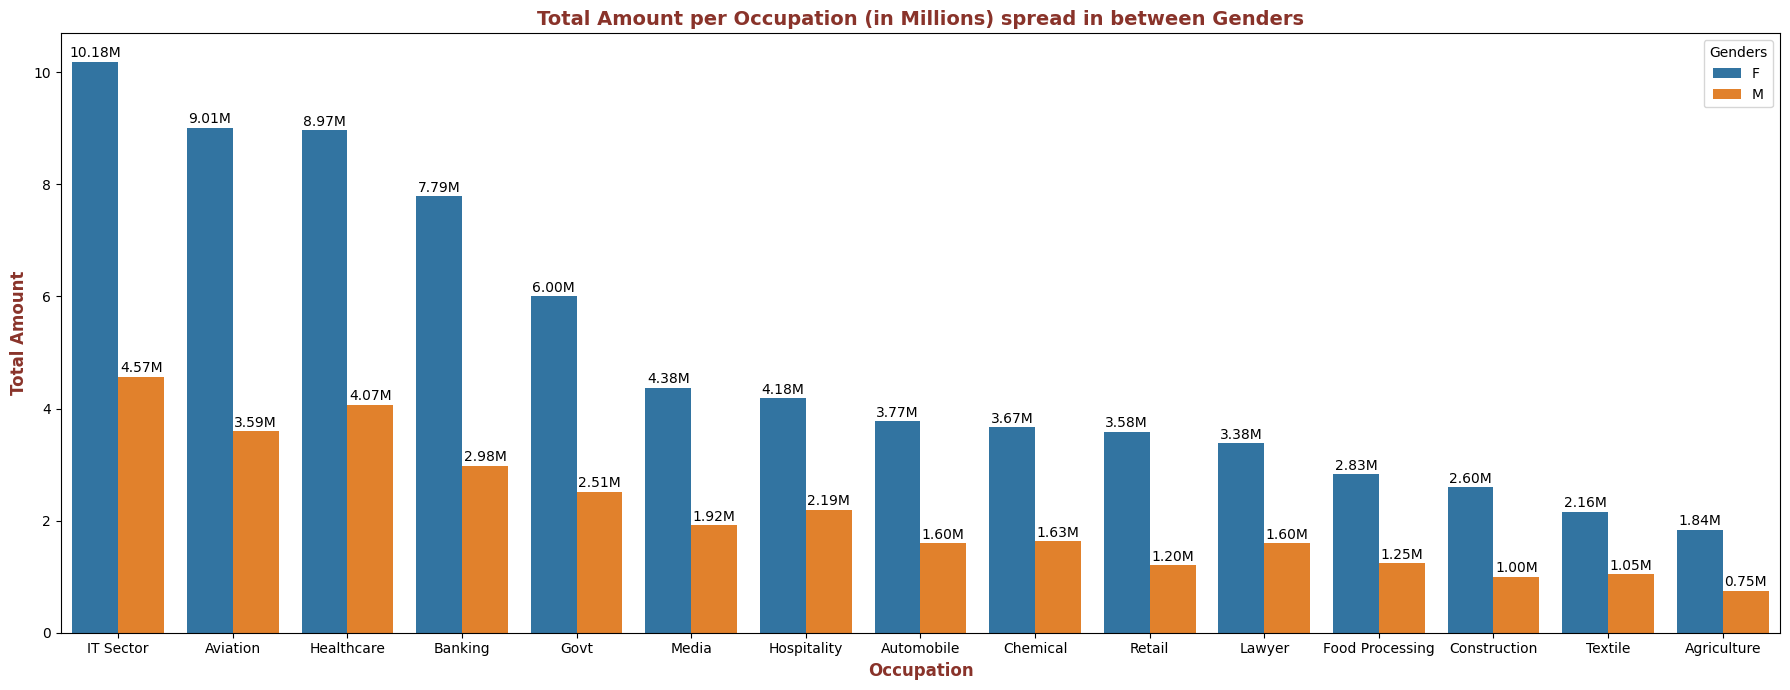

In [233]:
total_amount_per_occupation = df.groupby(['Occupation', 'Gender'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)

total_amount_per_occupation['Amount'] = total_amount_per_occupation['Amount'] / 1000000

plt.figure(figsize= (18,7))

plot = sns.barplot(data= total_amount_per_occupation, x= 'Occupation', y= 'Amount',
                   hue= 'Gender',
                   errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar,
                   labels = [f'{v:0.2f}M' for v in bar.datavalues],
                   padding = 1)

plt.title("Total Amount per Occupation (in Millions) spread in between Genders",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Occupation",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(title = 'Genders')
plt.tight_layout()

plt.show()


    Conclusion:
The graphs are pretty straightforward that IT sector placed more Orders subsequently purchase more products, of which Females took the lead

### Marital Status

In [234]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_Marital_Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F - 0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F - 1
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F - 1
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M - 0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M - 1


In [235]:
df.drop('Gender_Marital_Status', axis = 1, inplace = True)

In [236]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [237]:
#### Creating an another Column Gender-MaritalStatus

df['Gender-Married'] = df['Gender'] + '-' + df['Marital_Status'].map({0 : 'N', 1 : 'Y'})

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender-Married
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F-N
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,F-Y
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,F-Y
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,M-N
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,M-Y


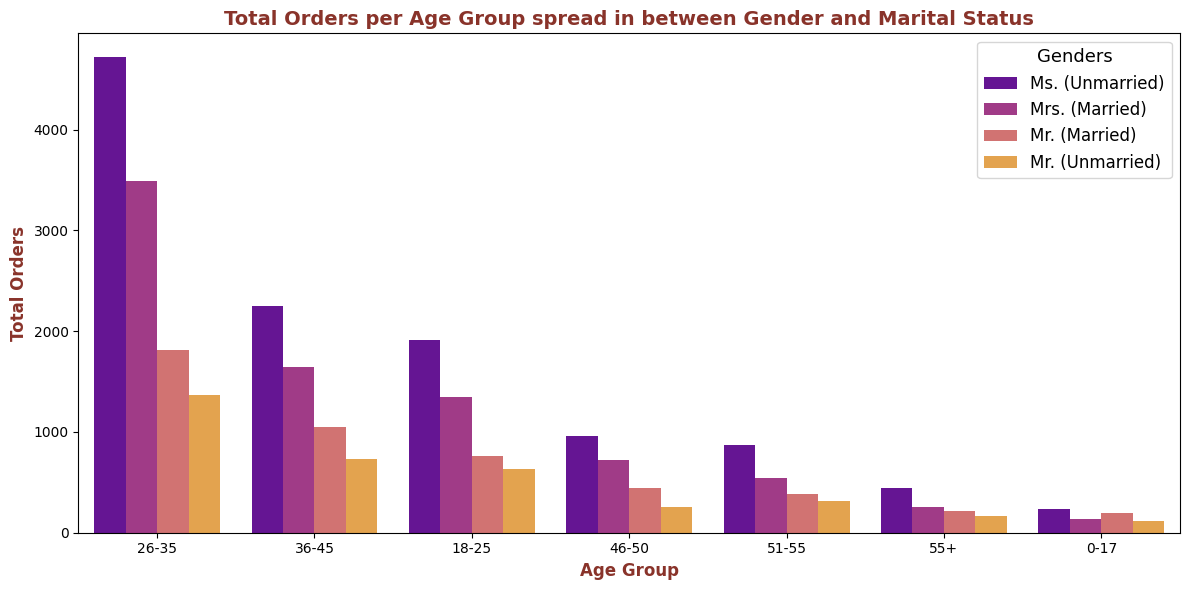

In [287]:
#### Sales per Age Group

total_orders_per_AgeGroup = df.groupby(['Age Group', 'Gender-Married'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

plt.figure(figsize= (12,6))

plot = sns.barplot(data= total_orders_per_AgeGroup, x= 'Age Group', y= 'Orders',
                   hue= 'Gender-Married',
                   palette= 'plasma',
                   errorbar= None)

plt.title("Total Orders per Age Group spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Age Group",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Orders",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'],
           title = 'Genders',
           title_fontsize='13',  # Size of the legend title
           fontsize='12')
plt.tight_layout()

plt.show()

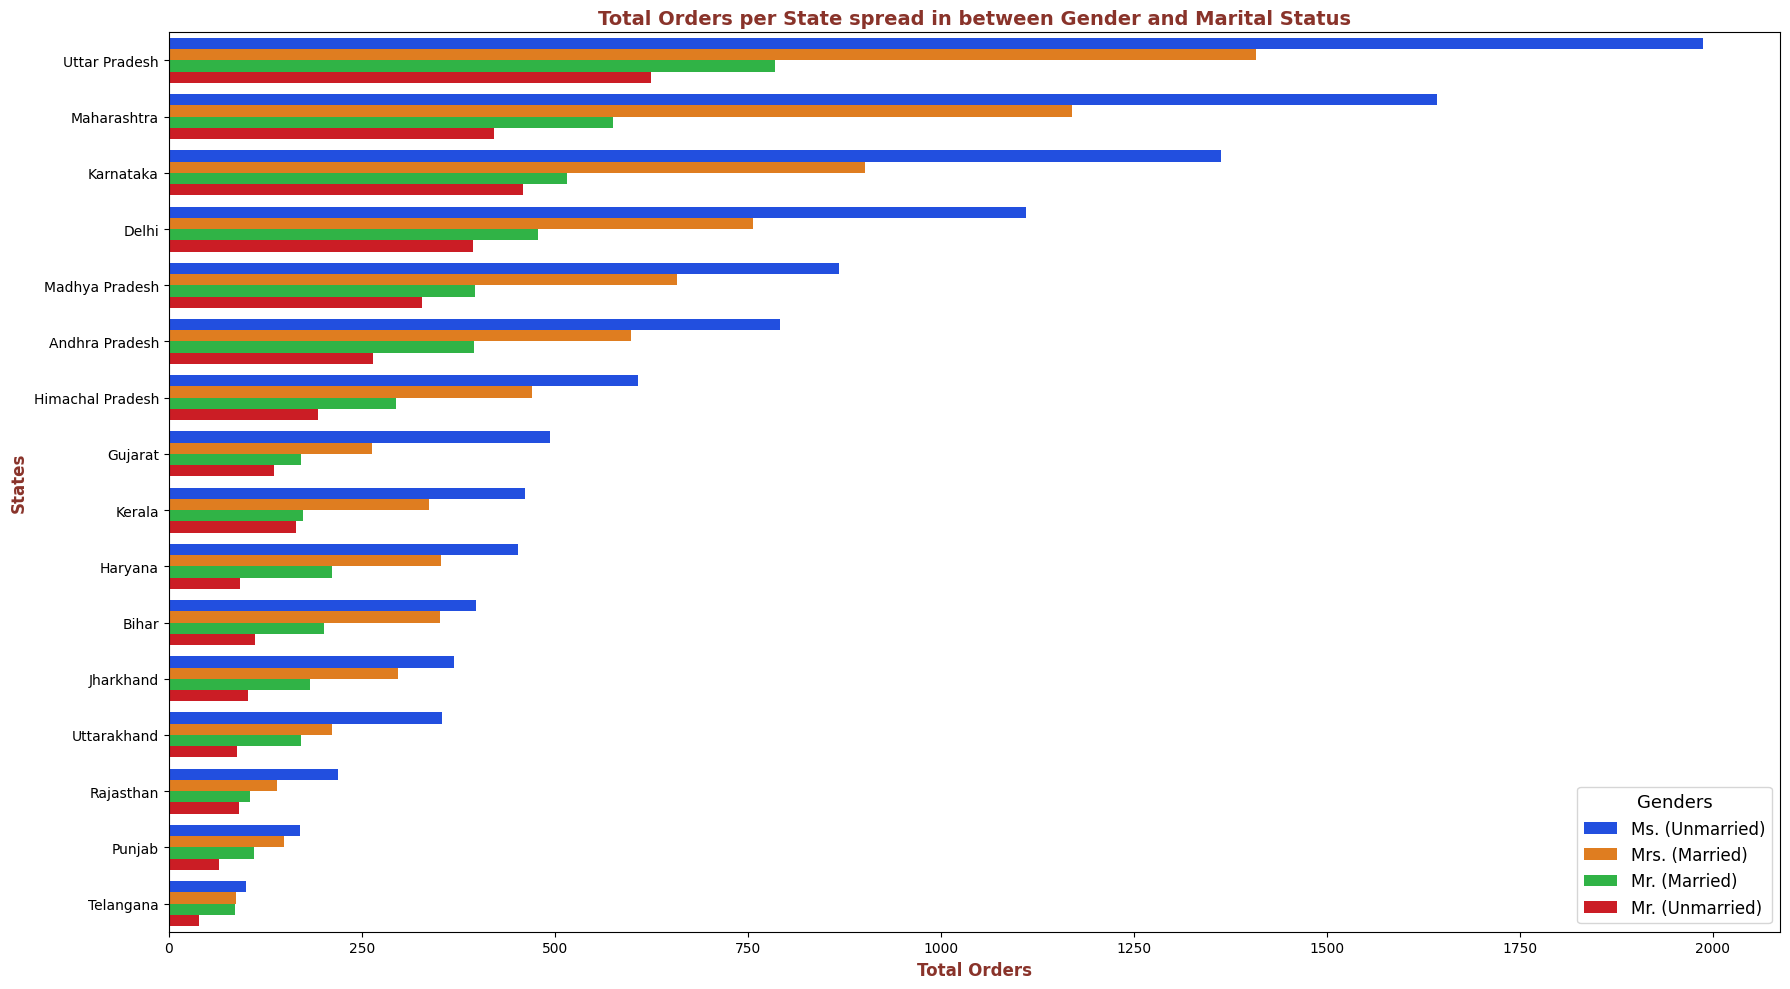

In [282]:
#### Sales per State

total_orders_per_State = df.groupby(['State', 'Gender-Married'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

plt.figure(figsize= (18,10))

plot = sns.barplot(data= total_orders_per_State, y= 'State', x= 'Orders',
                   hue= 'Gender-Married',
                   palette= 'bright',
                   errorbar= None)

plt.title("Total Orders per State spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Total Orders",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("States",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'],
           title = 'Genders',
           title_fontsize='13',  # Size of the legend title
           fontsize='12')
plt.tight_layout()

plt.show()

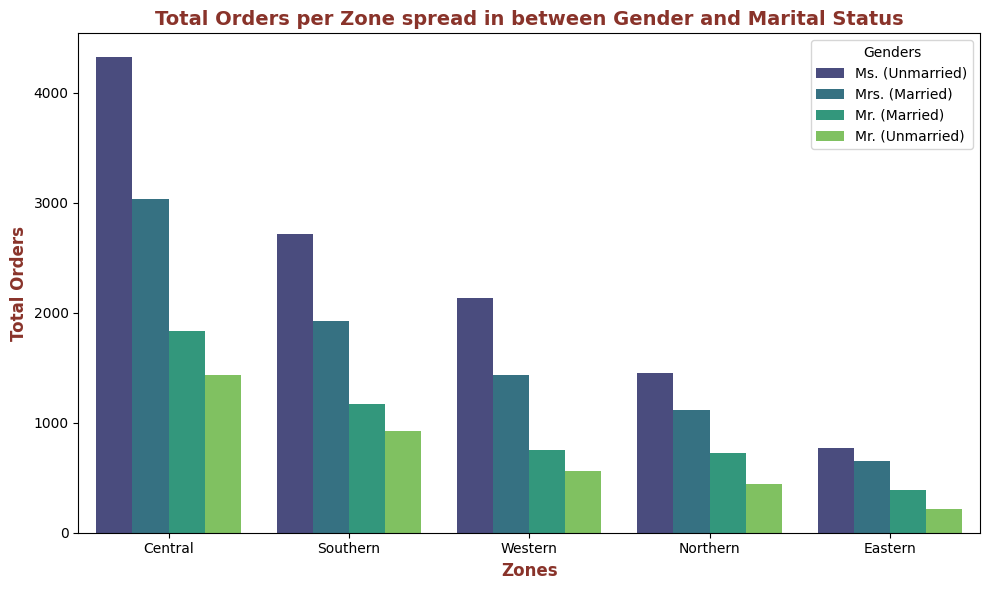

In [265]:
#### Sales per Zone

total_orders_per_Zone = df.groupby(['Zone', 'Gender-Married'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

plt.figure(figsize= (10,6))

plot = sns.barplot(data= total_orders_per_Zone, x= 'Zone', y= 'Orders',
                   hue= 'Gender-Married',
                   palette= 'viridis',
                   errorbar= None)

plt.title("Total Orders per Zone spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Zones",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Orders",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'], title = 'Genders')
plt.tight_layout()

plt.show()

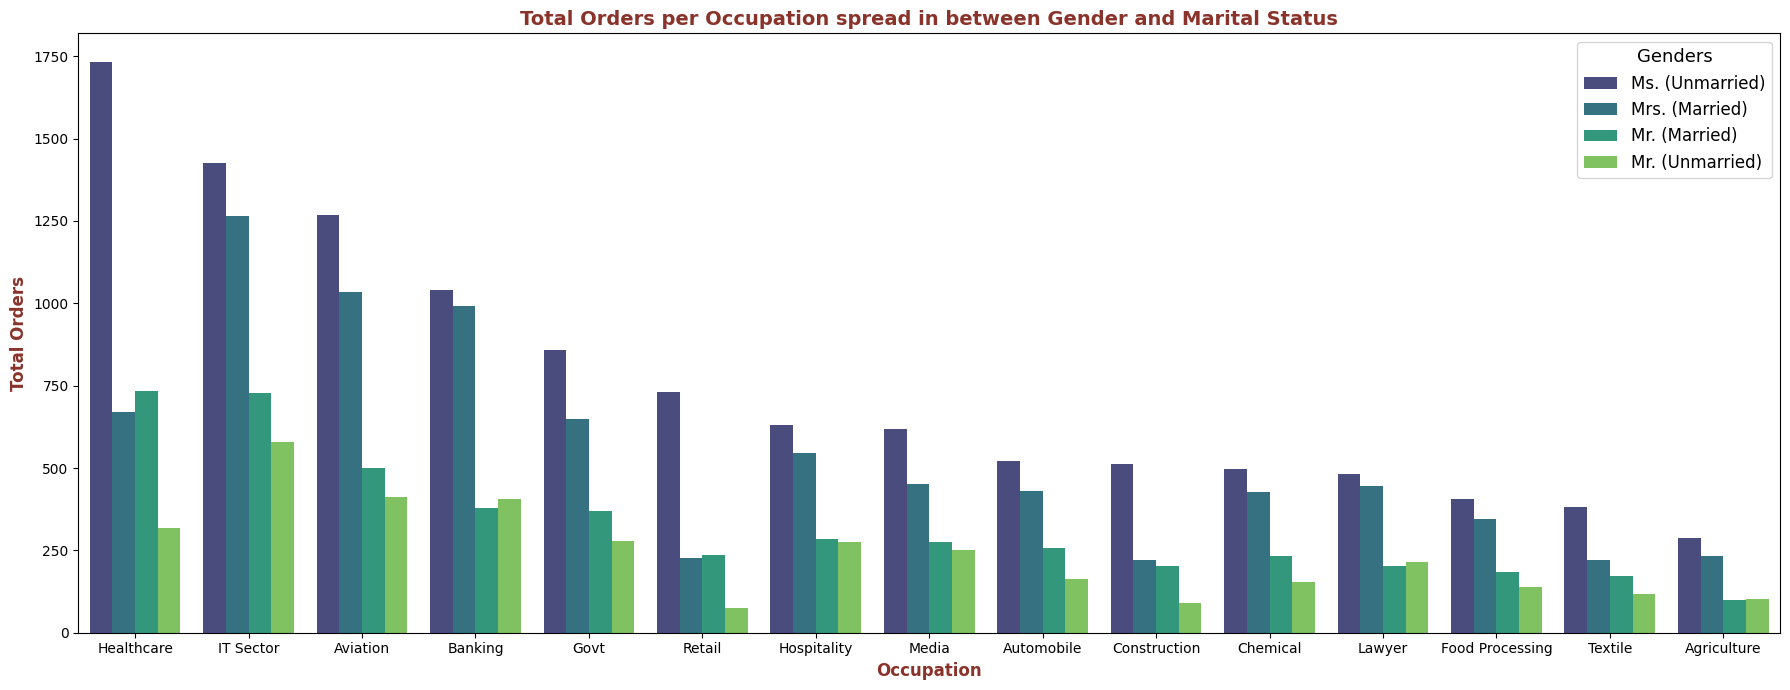

In [268]:
#### Sales per Occupation

total_orders_per_Occupation = df.groupby(['Occupation', 'Gender-Married'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

plt.figure(figsize= (18,7))

plot = sns.barplot(data= total_orders_per_Occupation, x= 'Occupation', y= 'Orders',
                   hue= 'Gender-Married',
                   palette= 'viridis',
                   errorbar= None)

plt.title("Total Orders per Occupation spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Occupation",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Orders",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'],
           title = 'Genders',
           title_fontsize='13',  # Size of the legend title
           fontsize='12')
plt.tight_layout()

plt.show()

In [271]:
df.head(1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender-Married
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,F-N


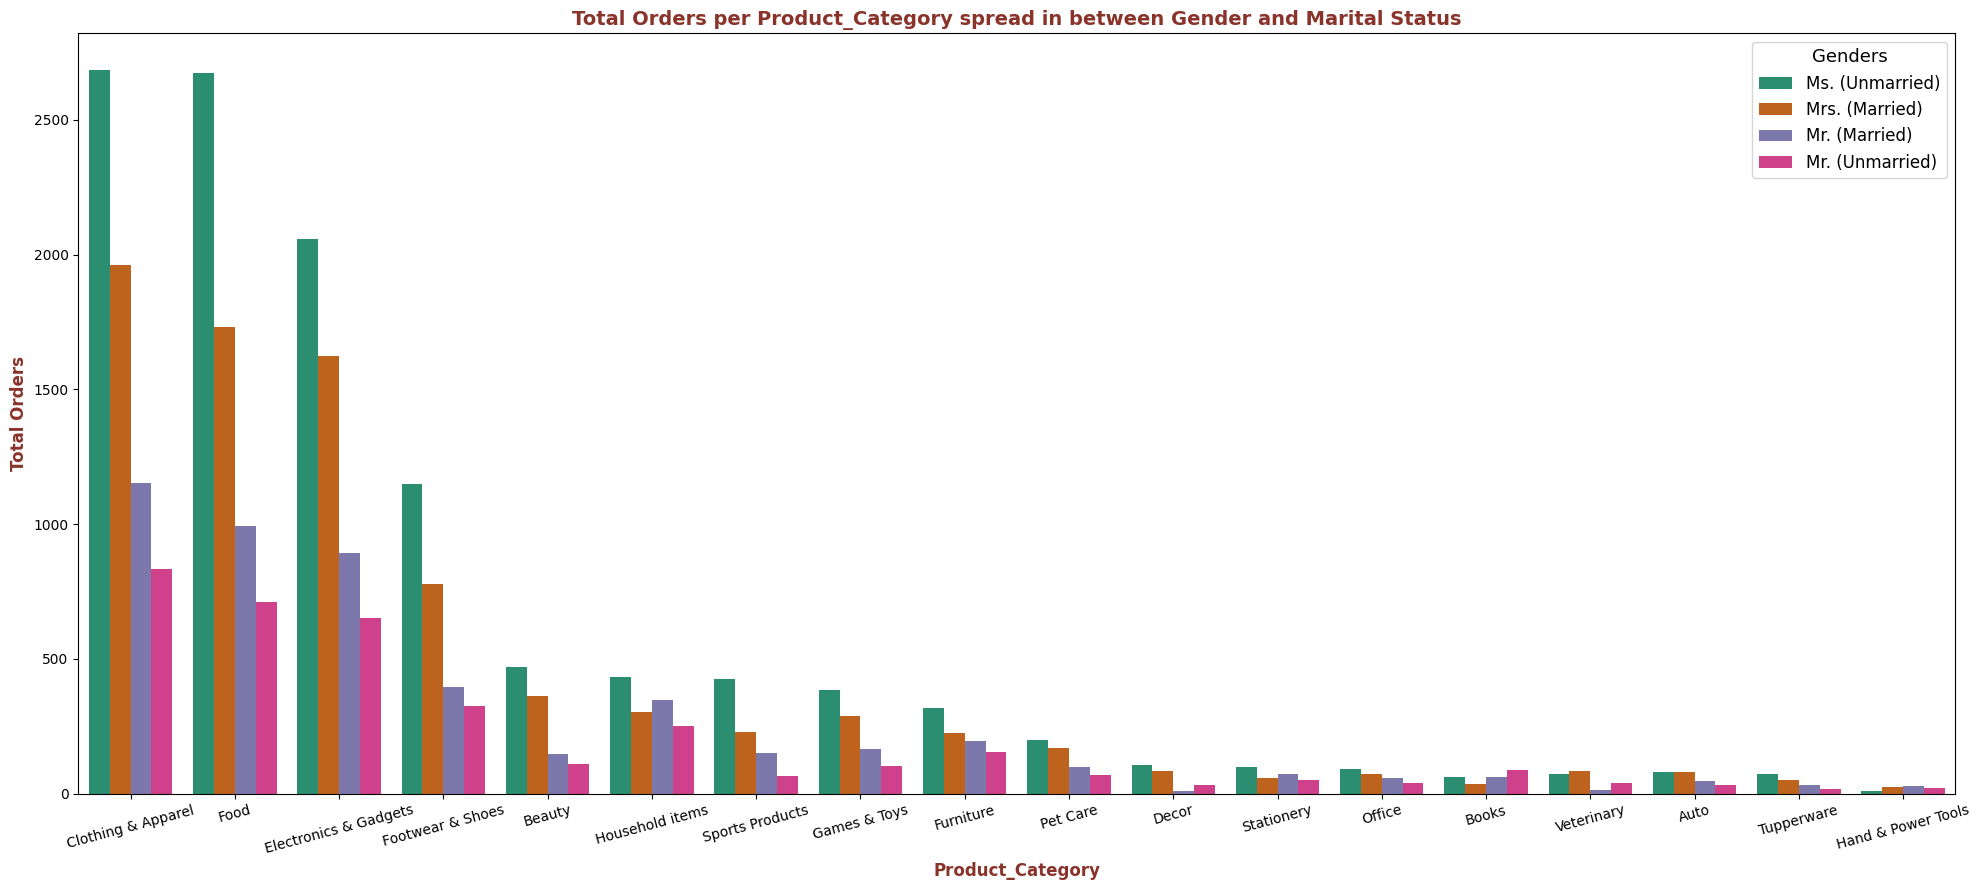

In [280]:
#### Sales per Age Occupation

total_orders_per_Product_Category = df.groupby(['Product_Category', 'Gender-Married'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False)

plt.figure(figsize= (20,9))

plot = sns.barplot(data= total_orders_per_Product_Category, x= 'Product_Category', y= 'Orders',
                   hue= 'Gender-Married',
                   palette= 'Dark2',
                   errorbar= None)

for label in plot.get_xticklabels():
    label.set_rotation(15)
    label.set_ha('center') 

plt.title("Total Orders per Product_Category spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Product_Category",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Orders",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'],
           title = 'Genders',
           title_fontsize='13',  # Size of the legend title
           fontsize='12')
plt.tight_layout()

plt.show()

# Conclusion:

High Number of Orders are coming from Unmarried Females, who are in between 25-36 age group, from Central Zone particularly from Uttar Pradesh and working in Health Care Towards Clothing and Apparels

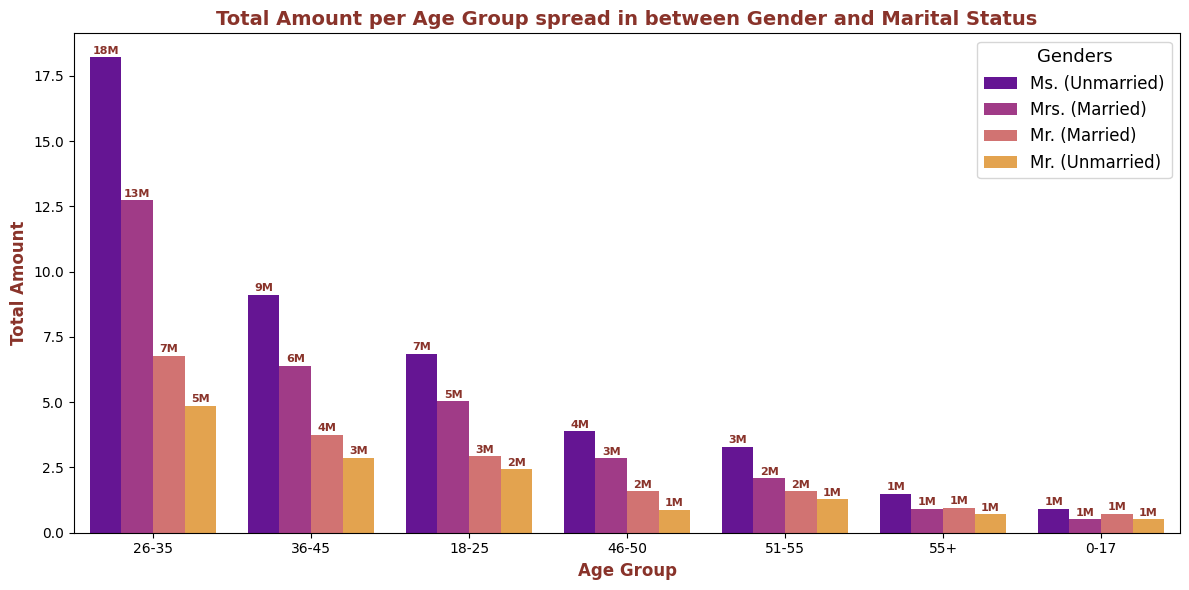

In [315]:
#### Total Amount per Age Group

total_amount_per_AgeGroup = df.groupby(['Age Group', 'Gender-Married'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

total_amount_per_AgeGroup['Amount'] = total_amount_per_AgeGroup['Amount'] / 1000000
plt.figure(figsize= (12,6))

plot = sns.barplot(data= total_amount_per_AgeGroup, x= 'Age Group', y= 'Amount',
                   hue= 'Gender-Married',
                   palette= 'plasma',
                   errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar,
                   labels= [f'{v:0.0f}M' for v in bar.datavalues],
                   padding= 1,
                   fontsize = 8,
                   fontweight = 'bold',
                   color = '#89332a')

plt.title("Total Amount per Age Group spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Age Group",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'],
           title = 'Genders',
           title_fontsize='13',  # Size of the legend title
           fontsize='12')
plt.tight_layout()

plt.show()

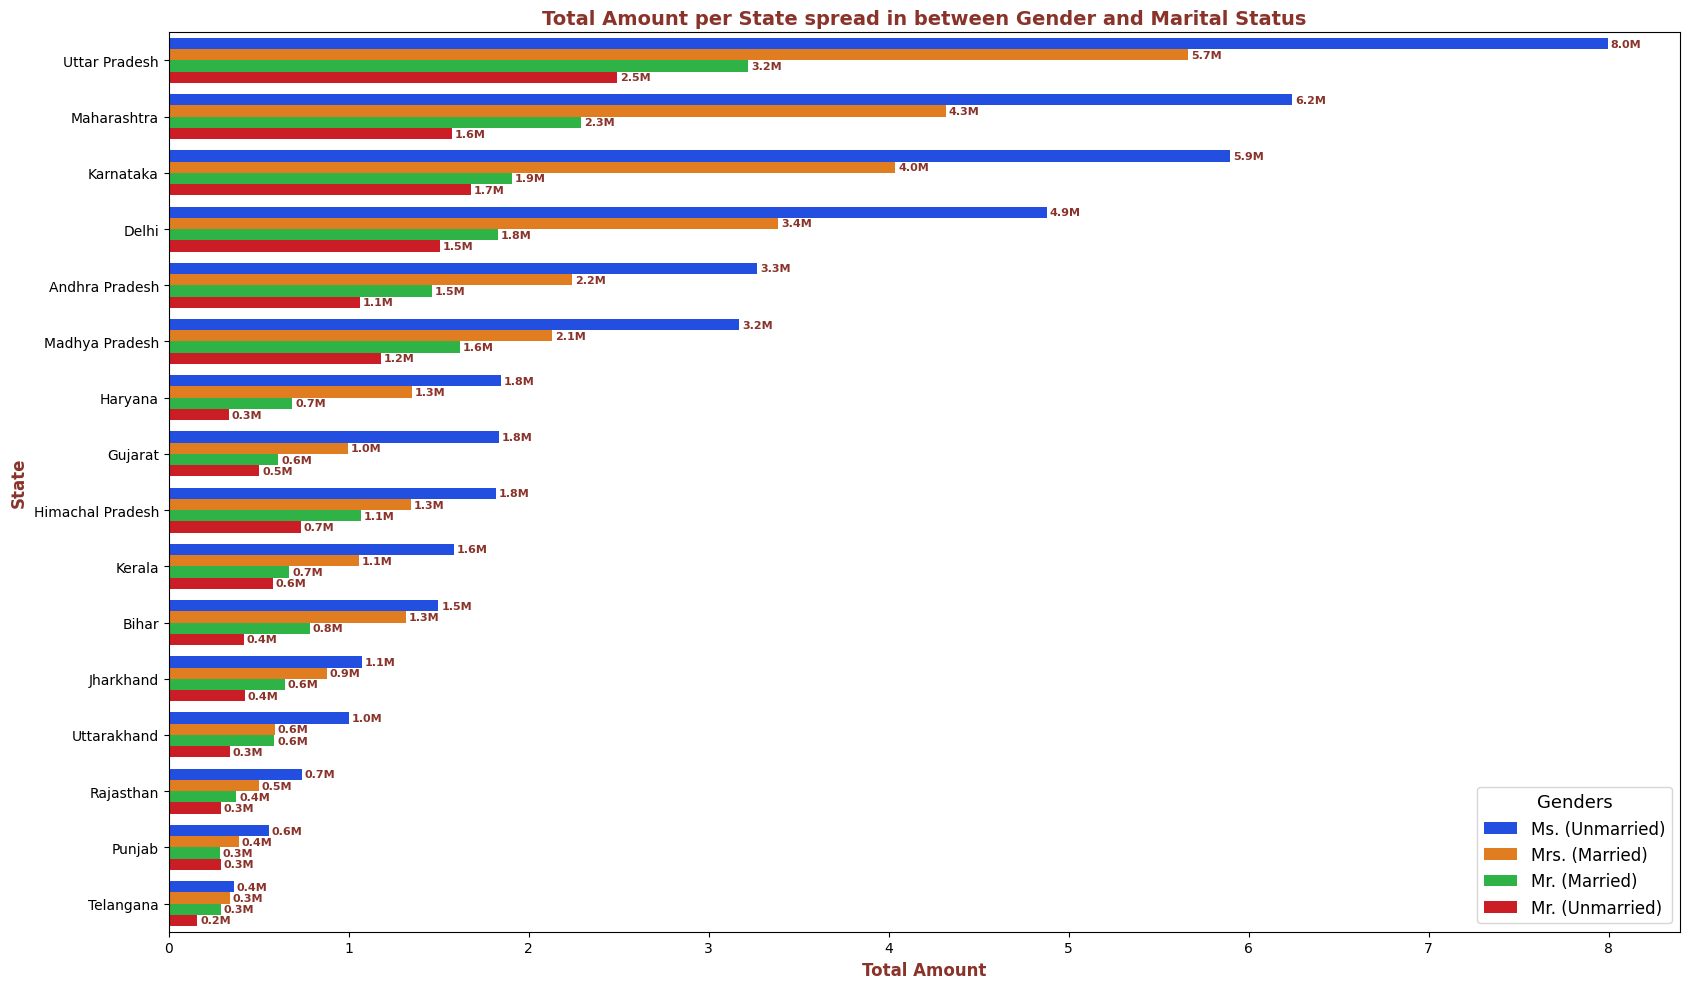

In [314]:
#### Total Amount per Age State

total_amount_per_State = df.groupby(['State', 'Gender-Married'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

total_amount_per_State['Amount'] = total_amount_per_State['Amount'] / 1000000
plt.figure(figsize= (17,10))

plot = sns.barplot(data= total_amount_per_State, y= 'State', x= 'Amount',
                   hue= 'Gender-Married',
                   palette= 'bright',
                   errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar,
                   labels= [f'{v:0.1f}M' for v in bar.datavalues],
                   padding= 2,
                   fontsize = 8,
                   fontweight = 'bold',
                   color = '#89332a')
    
plt.title("Total Amount per State spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("State",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'],
           title = 'Genders',
           title_fontsize='13',  # Size of the legend title
           fontsize='12')
plt.tight_layout()

plt.show()

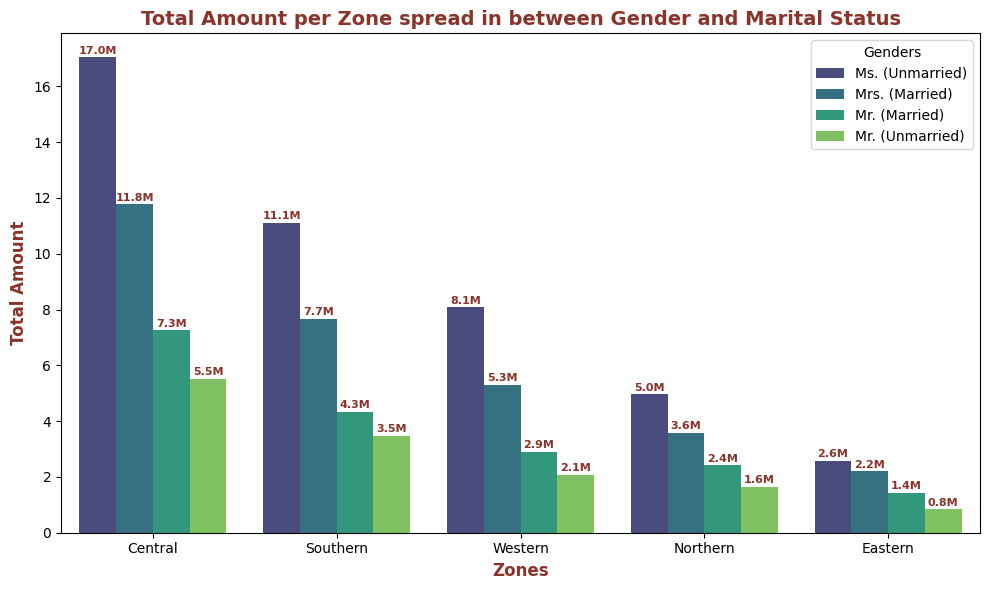

In [313]:
#### Total Amount per Zone

total_amount_per_Zone = df.groupby(['Zone', 'Gender-Married'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

total_amount_per_Zone['Amount'] = total_amount_per_Zone['Amount'] / 1000000

plt.figure(figsize= (10,6))

plot = sns.barplot(data= total_amount_per_Zone, x= 'Zone', y= 'Amount',
                   hue= 'Gender-Married',
                   palette= 'viridis',
                   errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar,
                   labels= [f'{v:0.1f}M' for v in bar.datavalues],
                   padding= 1,
                   fontsize = 8,
                   fontweight = 'bold',
                   color = '#89332a')

plt.title("Total Amount per Zone spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Zones",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'], title = 'Genders')
plt.tight_layout()

plt.show()

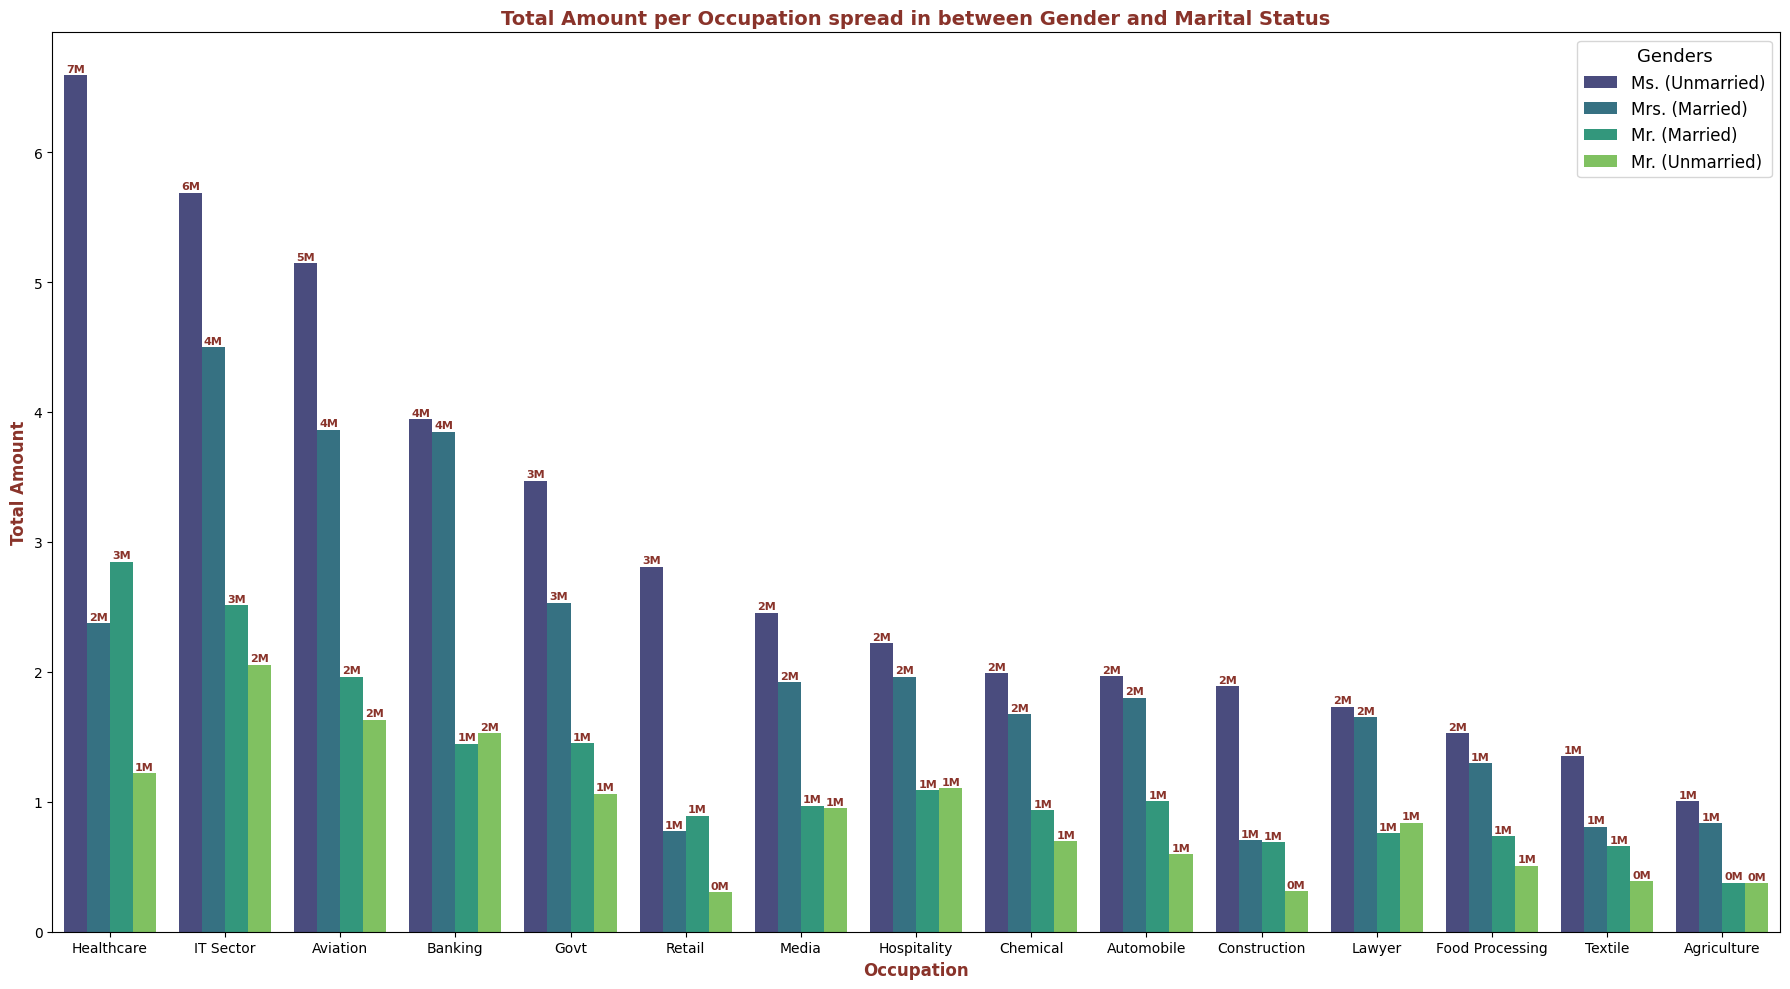

In [312]:
#### Sales per Occupation

total_amount_per_Occupation = df.groupby(['Occupation', 'Gender-Married'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

total_amount_per_Occupation['Amount'] = total_amount_per_Occupation['Amount'] / 1000000

plt.figure(figsize= (18,10))

plot = sns.barplot(data= total_amount_per_Occupation, x= 'Occupation', y= 'Amount',
                   hue= 'Gender-Married',
                   palette= 'viridis',
                   errorbar= None)

for bar in plot.containers:
    plot.bar_label(bar,
                   labels= [f'{v:0.0f}M' for v in bar.datavalues],
                   padding= 1,
                   fontsize = 8,
                   fontweight = 'bold',
                   color = '#89332a')

plt.title("Total Amount per Occupation spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Occupation",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'],
           title = 'Genders',
           title_fontsize='13',  # Size of the legend title
           fontsize='12')
plt.tight_layout()

plt.show()

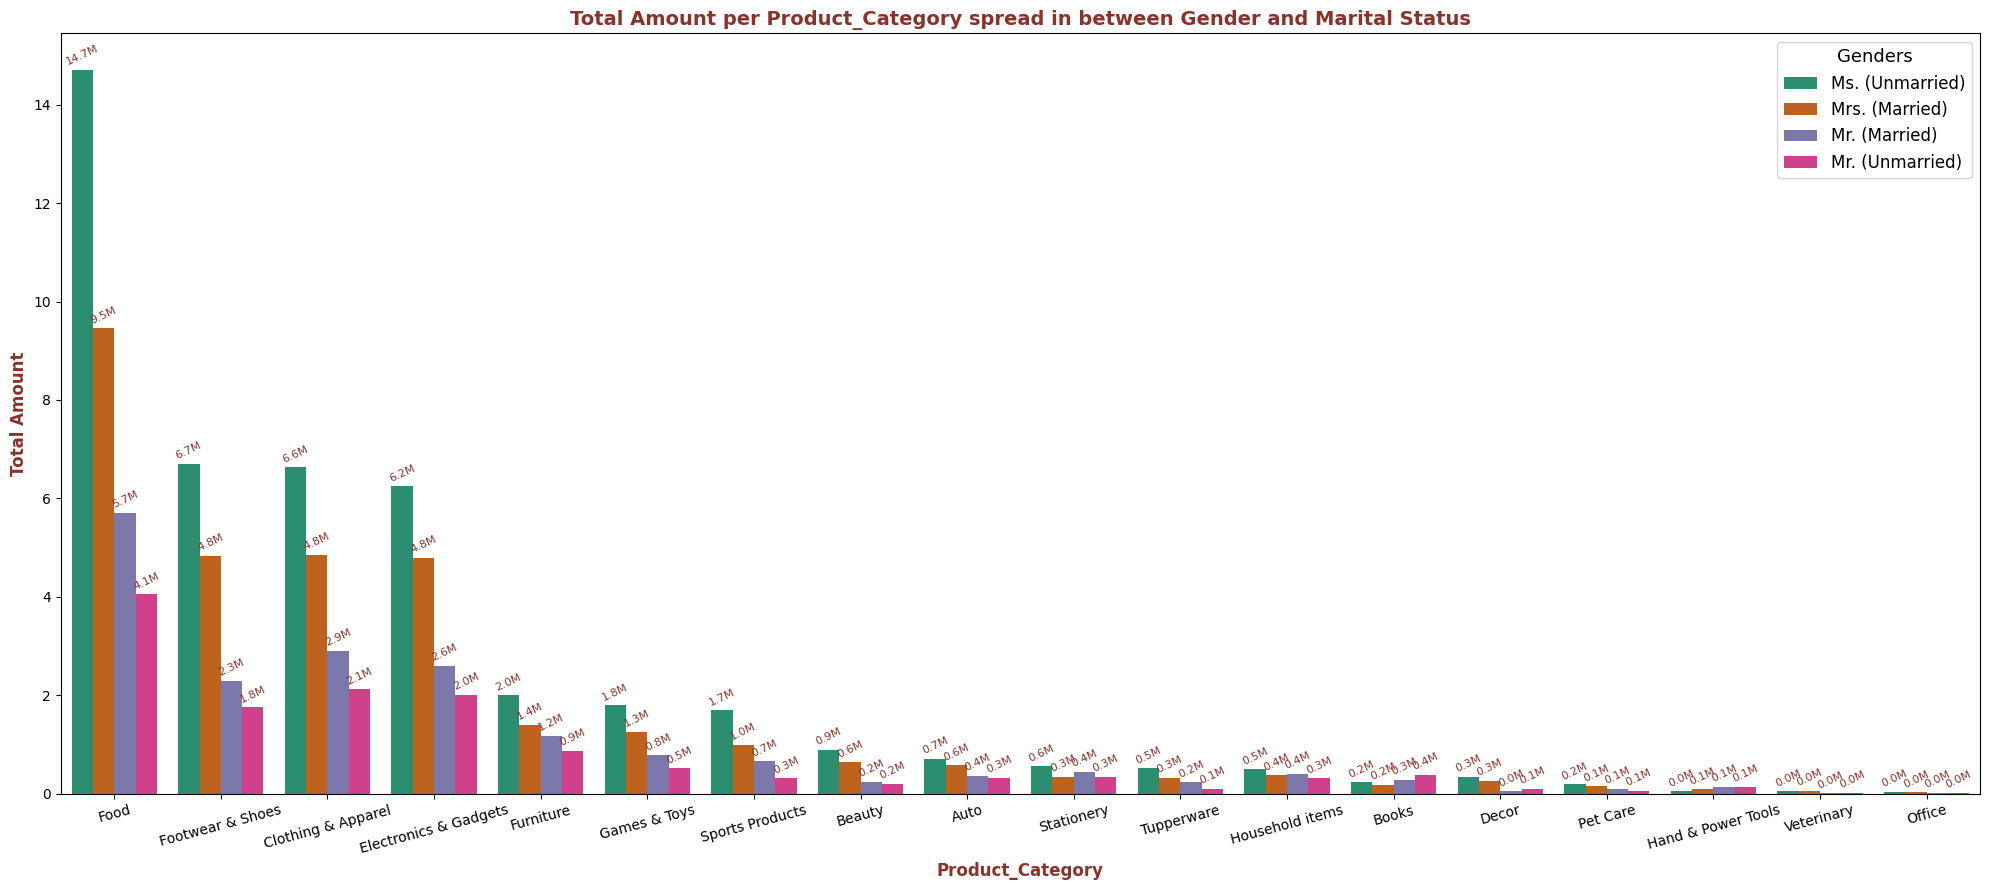

In [329]:
#### Sales per Age Occupation

total_amount_per_Product_Category = df.groupby(['Product_Category', 'Gender-Married'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)

total_amount_per_Product_Category['Amount'] = total_amount_per_Product_Category['Amount'] / 1000000

plt.figure(figsize= (20,9))

plot = sns.barplot(data= total_amount_per_Product_Category, x= 'Product_Category', y= 'Amount',
                   hue= 'Gender-Married',
                   palette= 'Dark2',
                   errorbar= None)

for label in plot.get_xticklabels():
    label.set_rotation(15)
    label.set_ha('center') 

for bar in plot.containers:
    plot.bar_label(bar,
                   labels= [f'{v:0.1f}M' for v in bar.datavalues],
                   padding= 2,
                   fontsize = 8,
                   rotation = 25,
                   fontweight = 'light',
                   color = '#89332a')

plt.title("Total Amount per Product_Category spread in between Gender and Marital Status",
          fontdict= {'fontsize': 14,
                     'fontweight' : 'bold',
                     'color': '#89332a'})
plt.xlabel("Product_Category",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.ylabel("Total Amount",
           fontdict={'fontsize': 12,
                     'fontweight' : 'bold',
                     'color':'#89332a'})
plt.legend(['Ms. (Unmarried)', 'Mrs. (Married)', 'Mr. (Married)', 'Mr. (Unmarried)'],
           title = 'Genders',
           title_fontsize='13',  # Size of the legend title
           fontsize='12')
plt.tight_layout()

plt.show()

# Conclusion:

High Revenues are coming from Unmarried Females, who are in between 25-36 age group, from Central Zone particularly from Uttar Pradesh and working in Health Care who are buying in Food Category